In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 200
sns.set_palette('colorblind')

### 1. Data Loading

Data yang digunakan berasal dari kaggle (Video games sales)

In [3]:
games = pd.read_csv('vgsales.csv')

In [4]:
games.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
games.tail(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.0,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.0,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.0,0.01
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.0,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01


In [6]:
games.shape

(16598, 11)

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Pada dataset ini terdapat 11 kolom, yang terdiri dari 6 kolom float dtype, 1 kolom integer, dan 4 kolom object dtype.

Berikut adalah keterangan setiap kolom:
- Rank - Rank dari seluruh penjualan
- Name - nama game
- Platform - platform game dirilis (PC, PS4, Wii, dll.)
- Year - tahun rilis game
- Genre - genre game
- Publisher - publisher game
- NA_Sales - penjualan di Amerika Utara (dalam Juta dolar)
- EU_Sales - penjualan di Eropa (dalam Juta dolar)
- JP_Sales - penjualan di Jepang (dalam Juta dolar)
- Other_Sales - penjualan di Negara lainnya (dalam Juta dolar)
- Global_Sales - penjualan total di seluruh dunia (dalam Juta dolar)

In [8]:
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


- Pada kolom rank nilai maksimumnya adalah 16600 sedangkan jumlah datanya 16598. Kolom ini akan kita hilangkan, dan akan kita agregasi ulang saat analisis karena jumlah data dengan rank yang tidak sesuai.

In [9]:
games.describe(include = 'O')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


- Kolom Name terdiri dari 11493 nama yang berbeda dari 16598 data. Artinya terdapat 5105 (30.7%) nama game muncul lebih dari 1 kali pada dataset ini. (Hal ini bisa terjadi karena mungkin saja terdapat game yang sama namun pada platform yang berbeda atau data game yang sama namun tahun penjualan yang berbeda (?)). Nanti akan kita lihat apakah memang terdapat duplikasi

- Game yang sering muncul adalah 'Need for Speed: Most Wanted' yaitu sebanyak 12 kali

- Terdapat 31 platform game yang berbeda pada data video game sales ini, dimana yang terbanyak adalah platform 'DS', muncul sebanyak 2163 kali

- Terdapat 12 genre game pada data video game sales ini, dengan genre 'Action' adalah yang terbanyak muncul, sebanyak 3316 kali

- Terdapat 578 Publisher game pada data video game sales ini, dengan 'Electronic Arts' adalah yang terbanyak muncul, sebanyak 1351 kali

### 2. Data Cleaning and Preprocessing

In [10]:
# Drop kolom rank

games.drop('Rank', axis = 1, inplace = True)

In [11]:
# Kita lihat jumlah game tiap tahun

games.Year.value_counts().sort_index()

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
Name: Year, dtype: int64

- Kita hanya akan menggunakan data sampai tahun 2016, karena setelah 2016 datanya tidak lengkap

In [12]:
games = games.drop(games[games.Year > 2016].index)

#### Cek data duplikat

In [13]:
# cek duplikat
games.duplicated().sum()

1

In [14]:
games[games.duplicated() == True]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14999,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


In [15]:
# cek duplikat berdasarkan kolom 'Name', 'Platform', dan 'Year'
games[games.duplicated(subset = ['Name', 'Platform','Year'], keep = False)].sort_values('Name')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
603,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.00,0.22,2.56
16127,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01
14997,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02
14999,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02


- Game Madden NFL 13 muncul 2 kali untuk penjualan di tahun 2012 dan platform PS3, tetapi data kedua menunjukan hanya sedikit penjualan, sangat berbeda jauh dengan data pertama. Kita akan drop data kedua

- Game Wii de Asobu: Metroid Prime merupakan data duplikat, kita akan drop salah satunya

In [16]:
games.drop_duplicates(subset = ['Name', 'Platform','Year'], keep = 'first', inplace = True)

#### Cek missing values

In [17]:
games.isnull().sum()

Name              0
Platform          0
Year            270
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [18]:
games.isnull().mean()*100

Name            0.000000
Platform        0.000000
Year            1.627290
Genre           0.000000
Publisher       0.349566
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

- Kita tidak memiliki data 'Year' untuk 270 games. Namun beberapa game memiliki tahun pada namanya, sehingga dengan itu kita dapat mengisi data 'Year'

In [19]:
year_from_title = games.loc[games.Year.isnull(), 'Name'].str.extract('(\d{4})', expand=False)
year_from_title

179      2004
377      2004
431       NaN
470      2006
607       NaN
         ... 
16307     NaN
16327     NaN
16366     NaN
16427     NaN
16493     NaN
Name: Name, Length: 270, dtype: object

In [20]:
games.loc[games.Year.isnull(), 'Year'] = year_from_title

In [21]:
games.isnull().sum()

Name              0
Platform          0
Year            253
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [22]:
games.isnull().mean()*100

Name            0.000000
Platform        0.000000
Year            1.524831
Genre           0.000000
Publisher       0.349566
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

- Setelah mengisi missing value kolom 'Year' dengan tahun yang tertera pada Nama game, sekarang tersisa 253 missing value pada kolom ini. Kita dapat mengisi ini dengan melakukan parsing data dari internet, namun untuk saat ini saya hanya akan menghapus 253 data ini karena jumlahnya juga hanya 1.5% dari total data.

In [23]:
games = games.dropna(subset='Year').reset_index(drop = True)
games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16334,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16335,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16336,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16337,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


- kita juga akan drop missing data pada kolom Publisher karena jumlahnya tidak signifikan

In [24]:
games = games.dropna(subset='Publisher').reset_index(drop = True)

In [25]:
# Ubah tipe data
games['Year'] = games['Year'].astype('int')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16302 entries, 0 to 16301
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16302 non-null  object 
 1   Platform      16302 non-null  object 
 2   Year          16302 non-null  int32  
 3   Genre         16302 non-null  object 
 4   Publisher     16302 non-null  object 
 5   NA_Sales      16302 non-null  float64
 6   EU_Sales      16302 non-null  float64
 7   JP_Sales      16302 non-null  float64
 8   Other_Sales   16302 non-null  float64
 9   Global_Sales  16302 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.2+ MB


In [26]:
games.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 3. Exploratory Data Analysis

- Pertama mari kita lihat seberapa banyak jumlah game yang dirilis setiap tahunnya. 

#### Jumlah game yang dirilis setiap tahun

In [27]:
df = games.groupby('Year', as_index=False)['Name'].count().rename(columns = {'Name':'Jumlah Game'})
df['Jumlah kumulatif Game'] = df['Jumlah Game'].cumsum()
df

,Year,Jumlah Game,Jumlah kumulatif Game
0,1980,9,9
1,1981,46,55
2,1982,36,91
3,1983,17,108
4,1984,14,122
5,1985,14,136
6,1986,21,157
7,1987,16,173
8,1988,15,188
9,1989,17,205


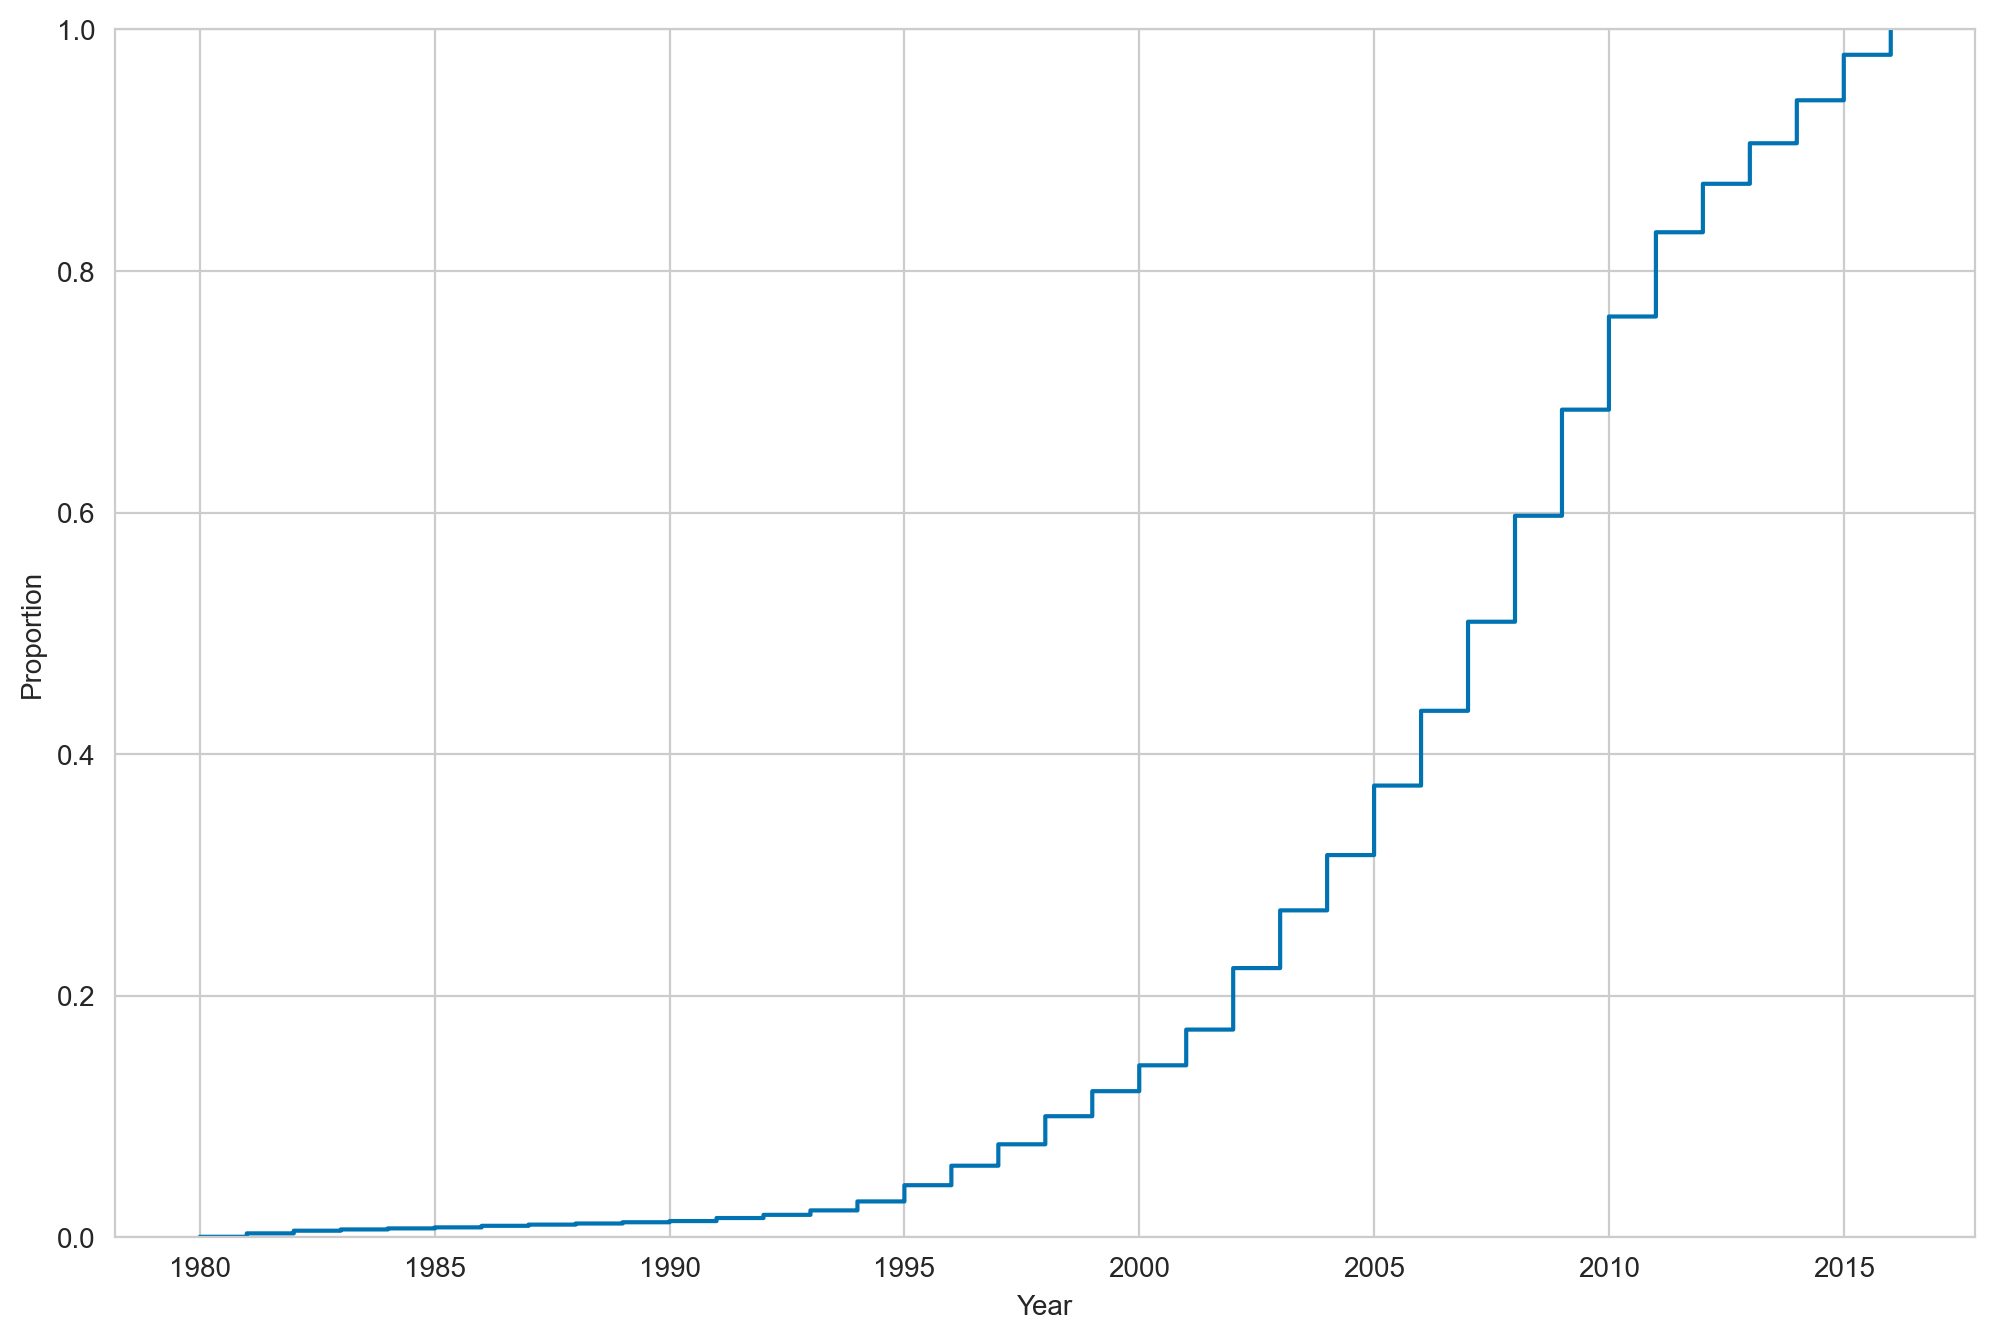

In [28]:
plt.figure(figsize = (12, 8))
sns.ecdfplot(data=games, x='Year')
plt.show()

- Terlihat bahwa lebih dari 60% game dirilis pada rentang tahun 2005-2016

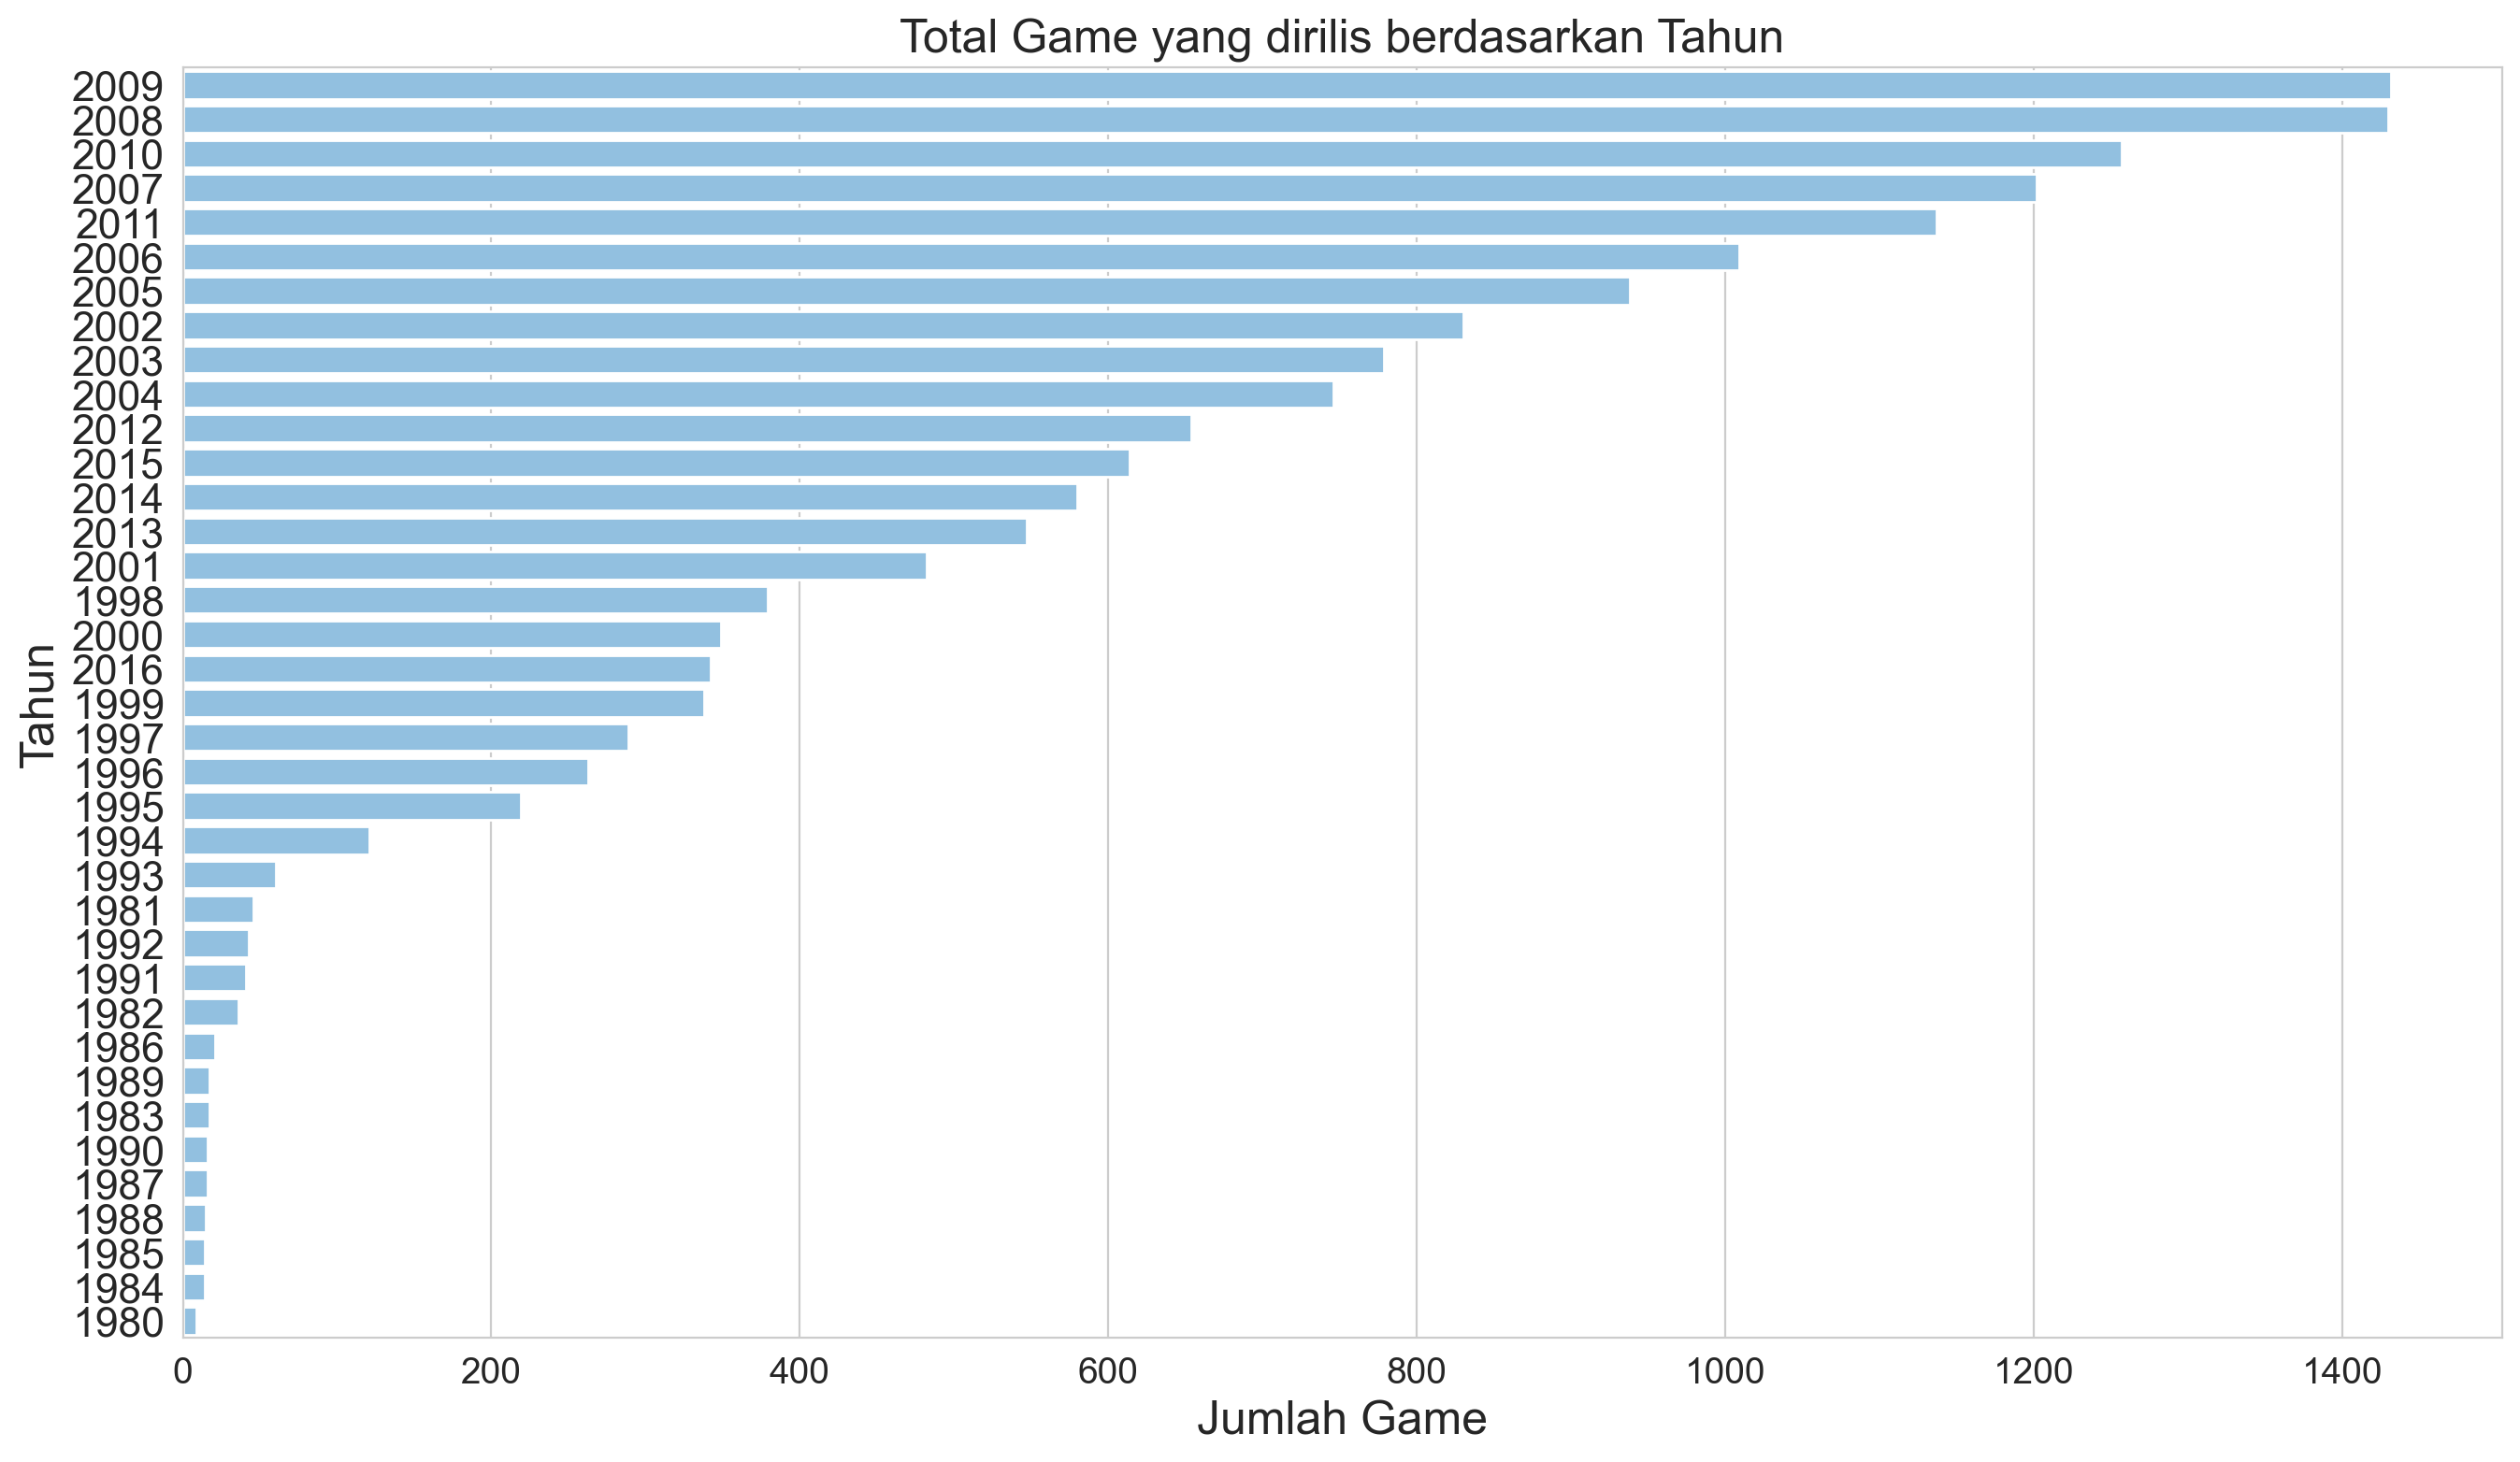

In [29]:
plt.figure(figsize = (16, 9))

sns.countplot(y='Year', data = games,
              order = games.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index, color = '#85c2ed')
plt.title('Total Game yang dirilis berdasarkan Tahun', fontsize = 18)
plt.ylabel('Tahun', fontsize = 18)
plt.xlabel('Jumlah Game', fontsize = 18)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 16)
plt.show();

- Tahun dengan rilis game terbanyak adalah tahun 2009 dengan total 1432 game.
- Top 5 tahun dengan rilis game terbanyak yaitu:
 1. 2009
 2. 2008
 3. 2010
 4. 2007
 5. 2011


#### Platform dan Genre untuk game yang dirilis tahun 2007-2011

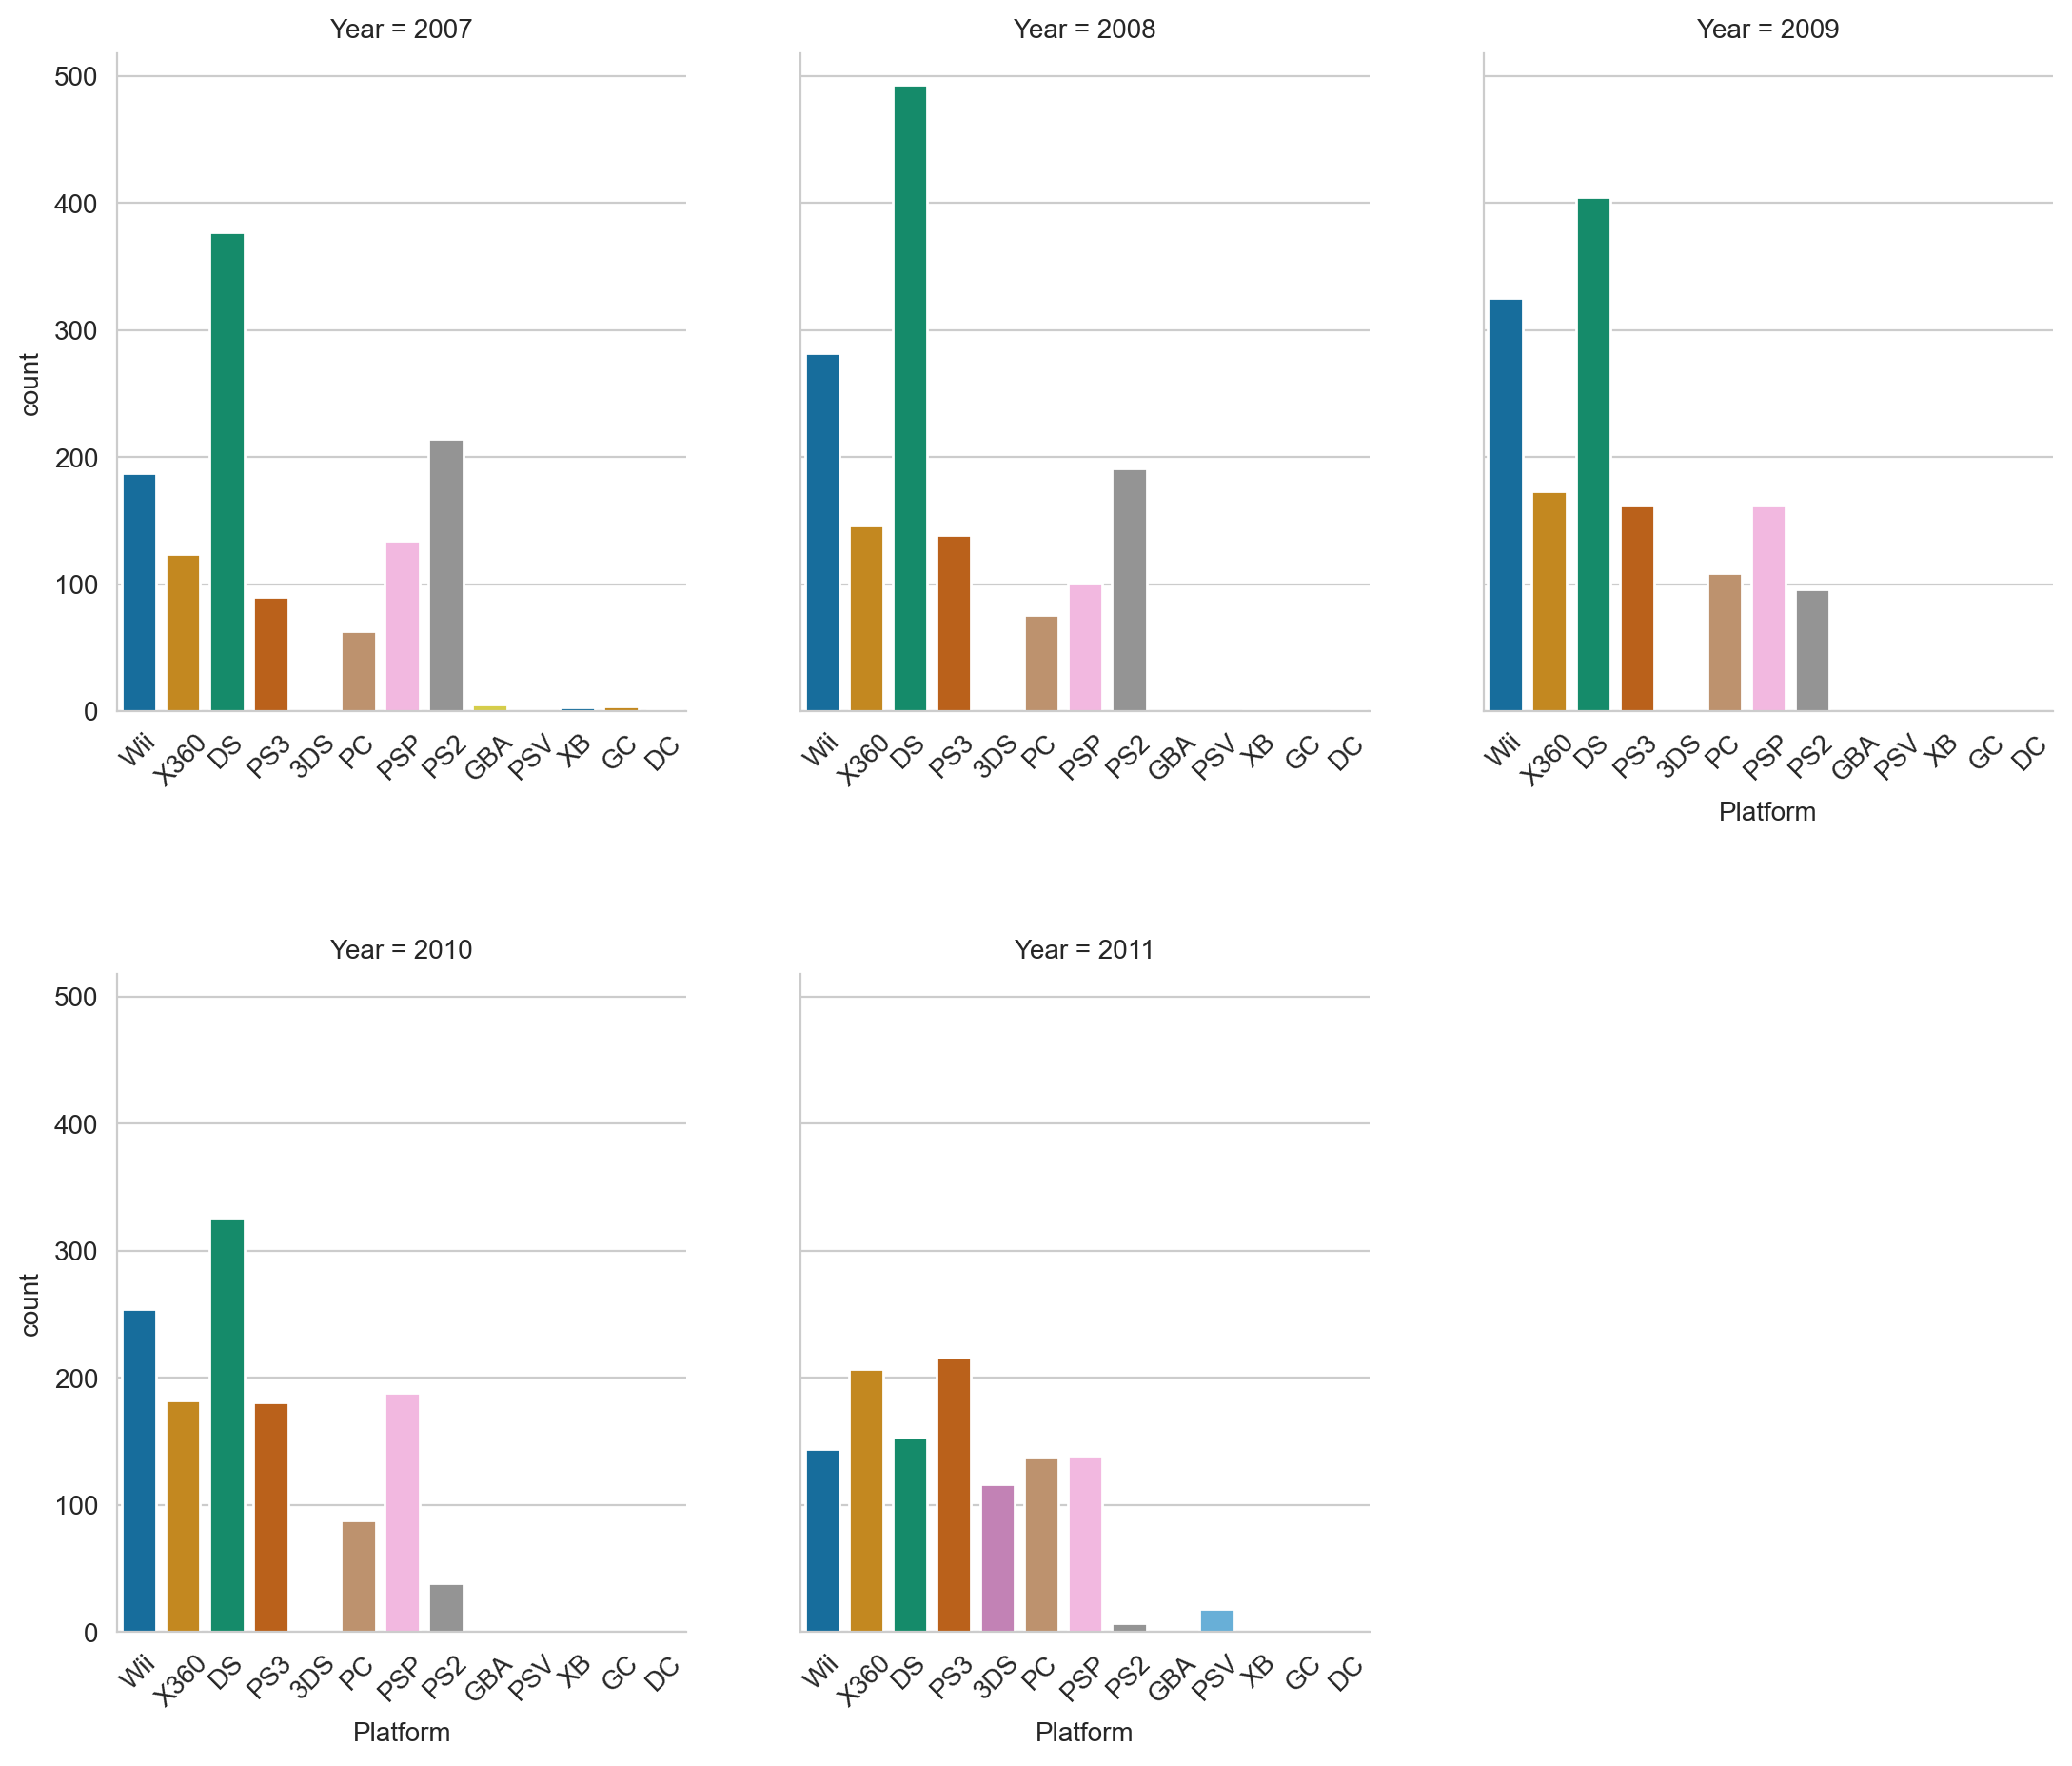

In [30]:
g = sns.catplot(x = 'Platform', col = 'Year', kind = 'count',
            data = games[games['Year'].isin([2009,2008,2010,2007,2011])],
            col_wrap=3, palette = 'colorblind',
            height=4.5, aspect=.8)

g.fig.subplots_adjust(wspace=.2, hspace=.4)
g.set_xticklabels(rotation=45)

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

- Dalam rentang 2007-2010 platform DS selalu paling banyak menerima game yang baru di rilis, namun pada tahun 2011 jumlahnya tidak terlalu berbeda jauh dengan platform lainnya

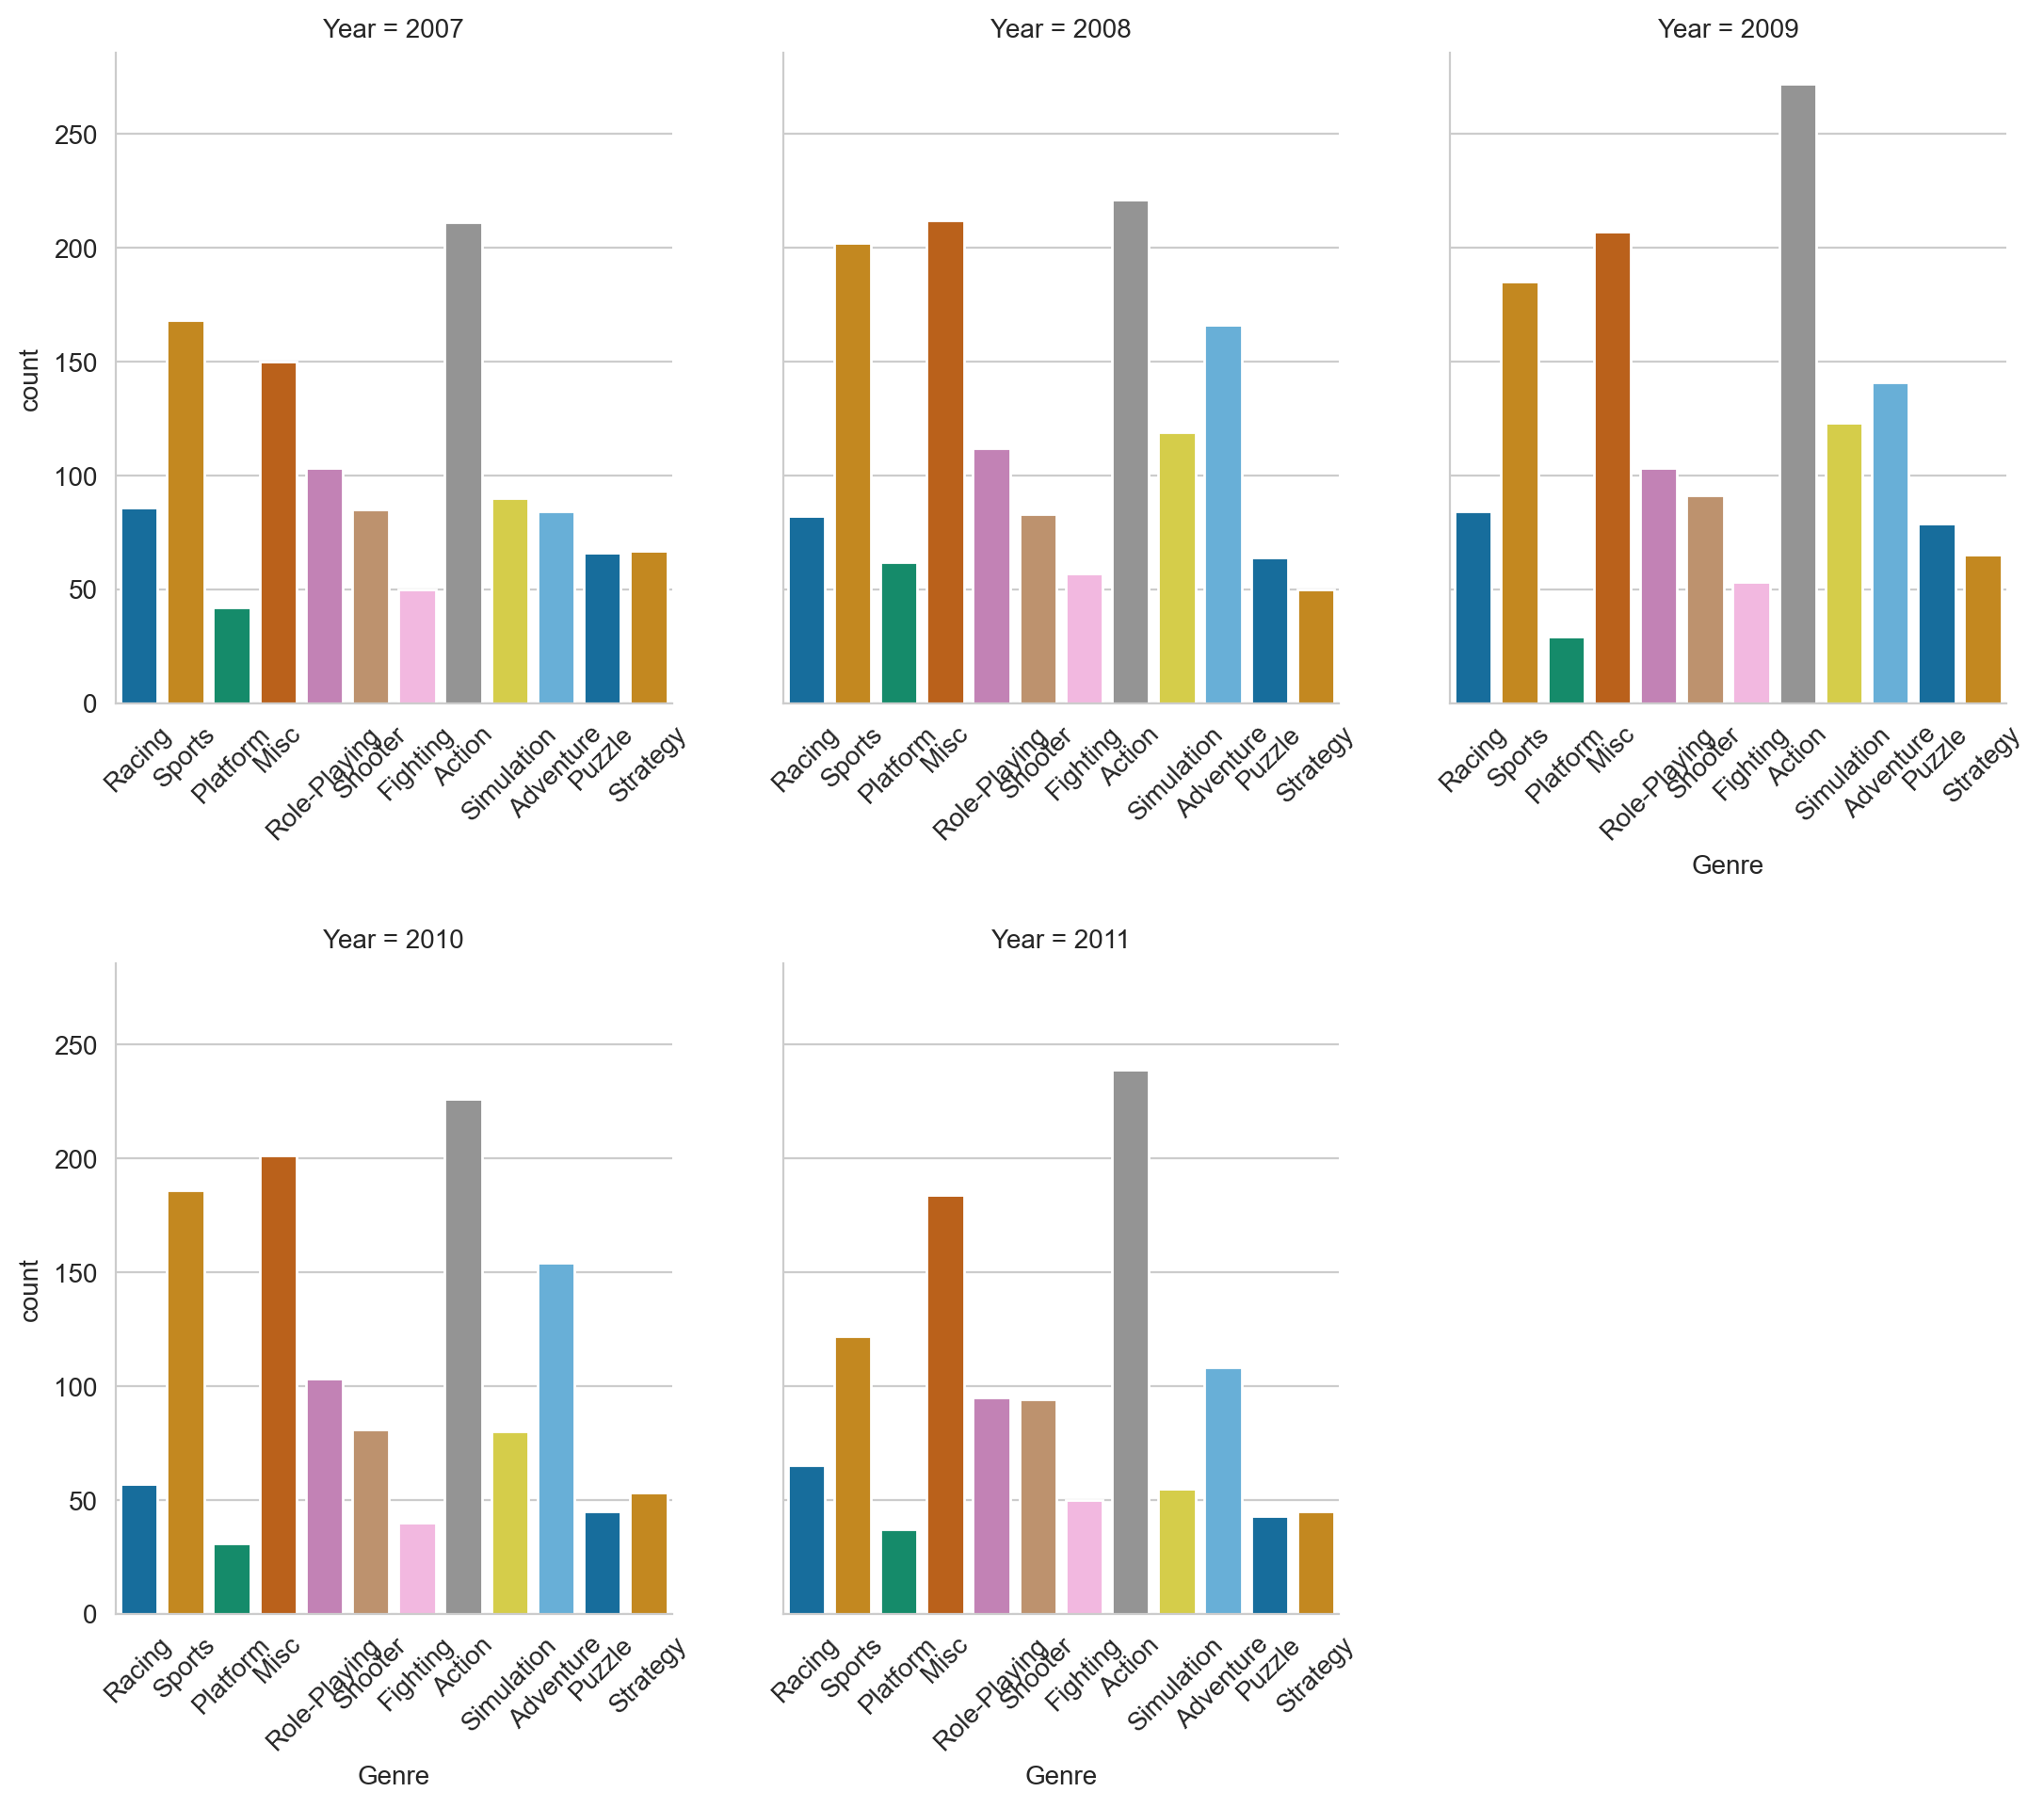

In [31]:
g = sns.catplot(x = 'Genre', col = 'Year', kind = 'count',
            data = games[games['Year'].isin([2009,2008,2010,2007,2011])],
            col_wrap=3, palette = 'colorblind',
            height=4.5, aspect=.8)

g.fig.subplots_adjust(wspace=.2, hspace=.4)
g.set_xticklabels(rotation=45)

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

- Dalam 5 tahun ini (2007-2011) genre yang dirilis cukup bervariasi, meskipun genre Action menjadi yang paling banyak dirilis.

#### Genre game yang paling banyak dirilis

In [32]:
games.groupby('Genre', as_index = False)['Name'].count().sort_values(by = 'Name', ascending = False).rename(columns = {'Name':'Jumlah Game'}).reset_index(drop = True)

,Genre,Jumlah Game
0,Action,3251
1,Sports,2315
2,Misc,1686
3,Role-Playing,1468
4,Shooter,1282
5,Adventure,1274
6,Racing,1228
7,Platform,875
8,Simulation,847
9,Fighting,836


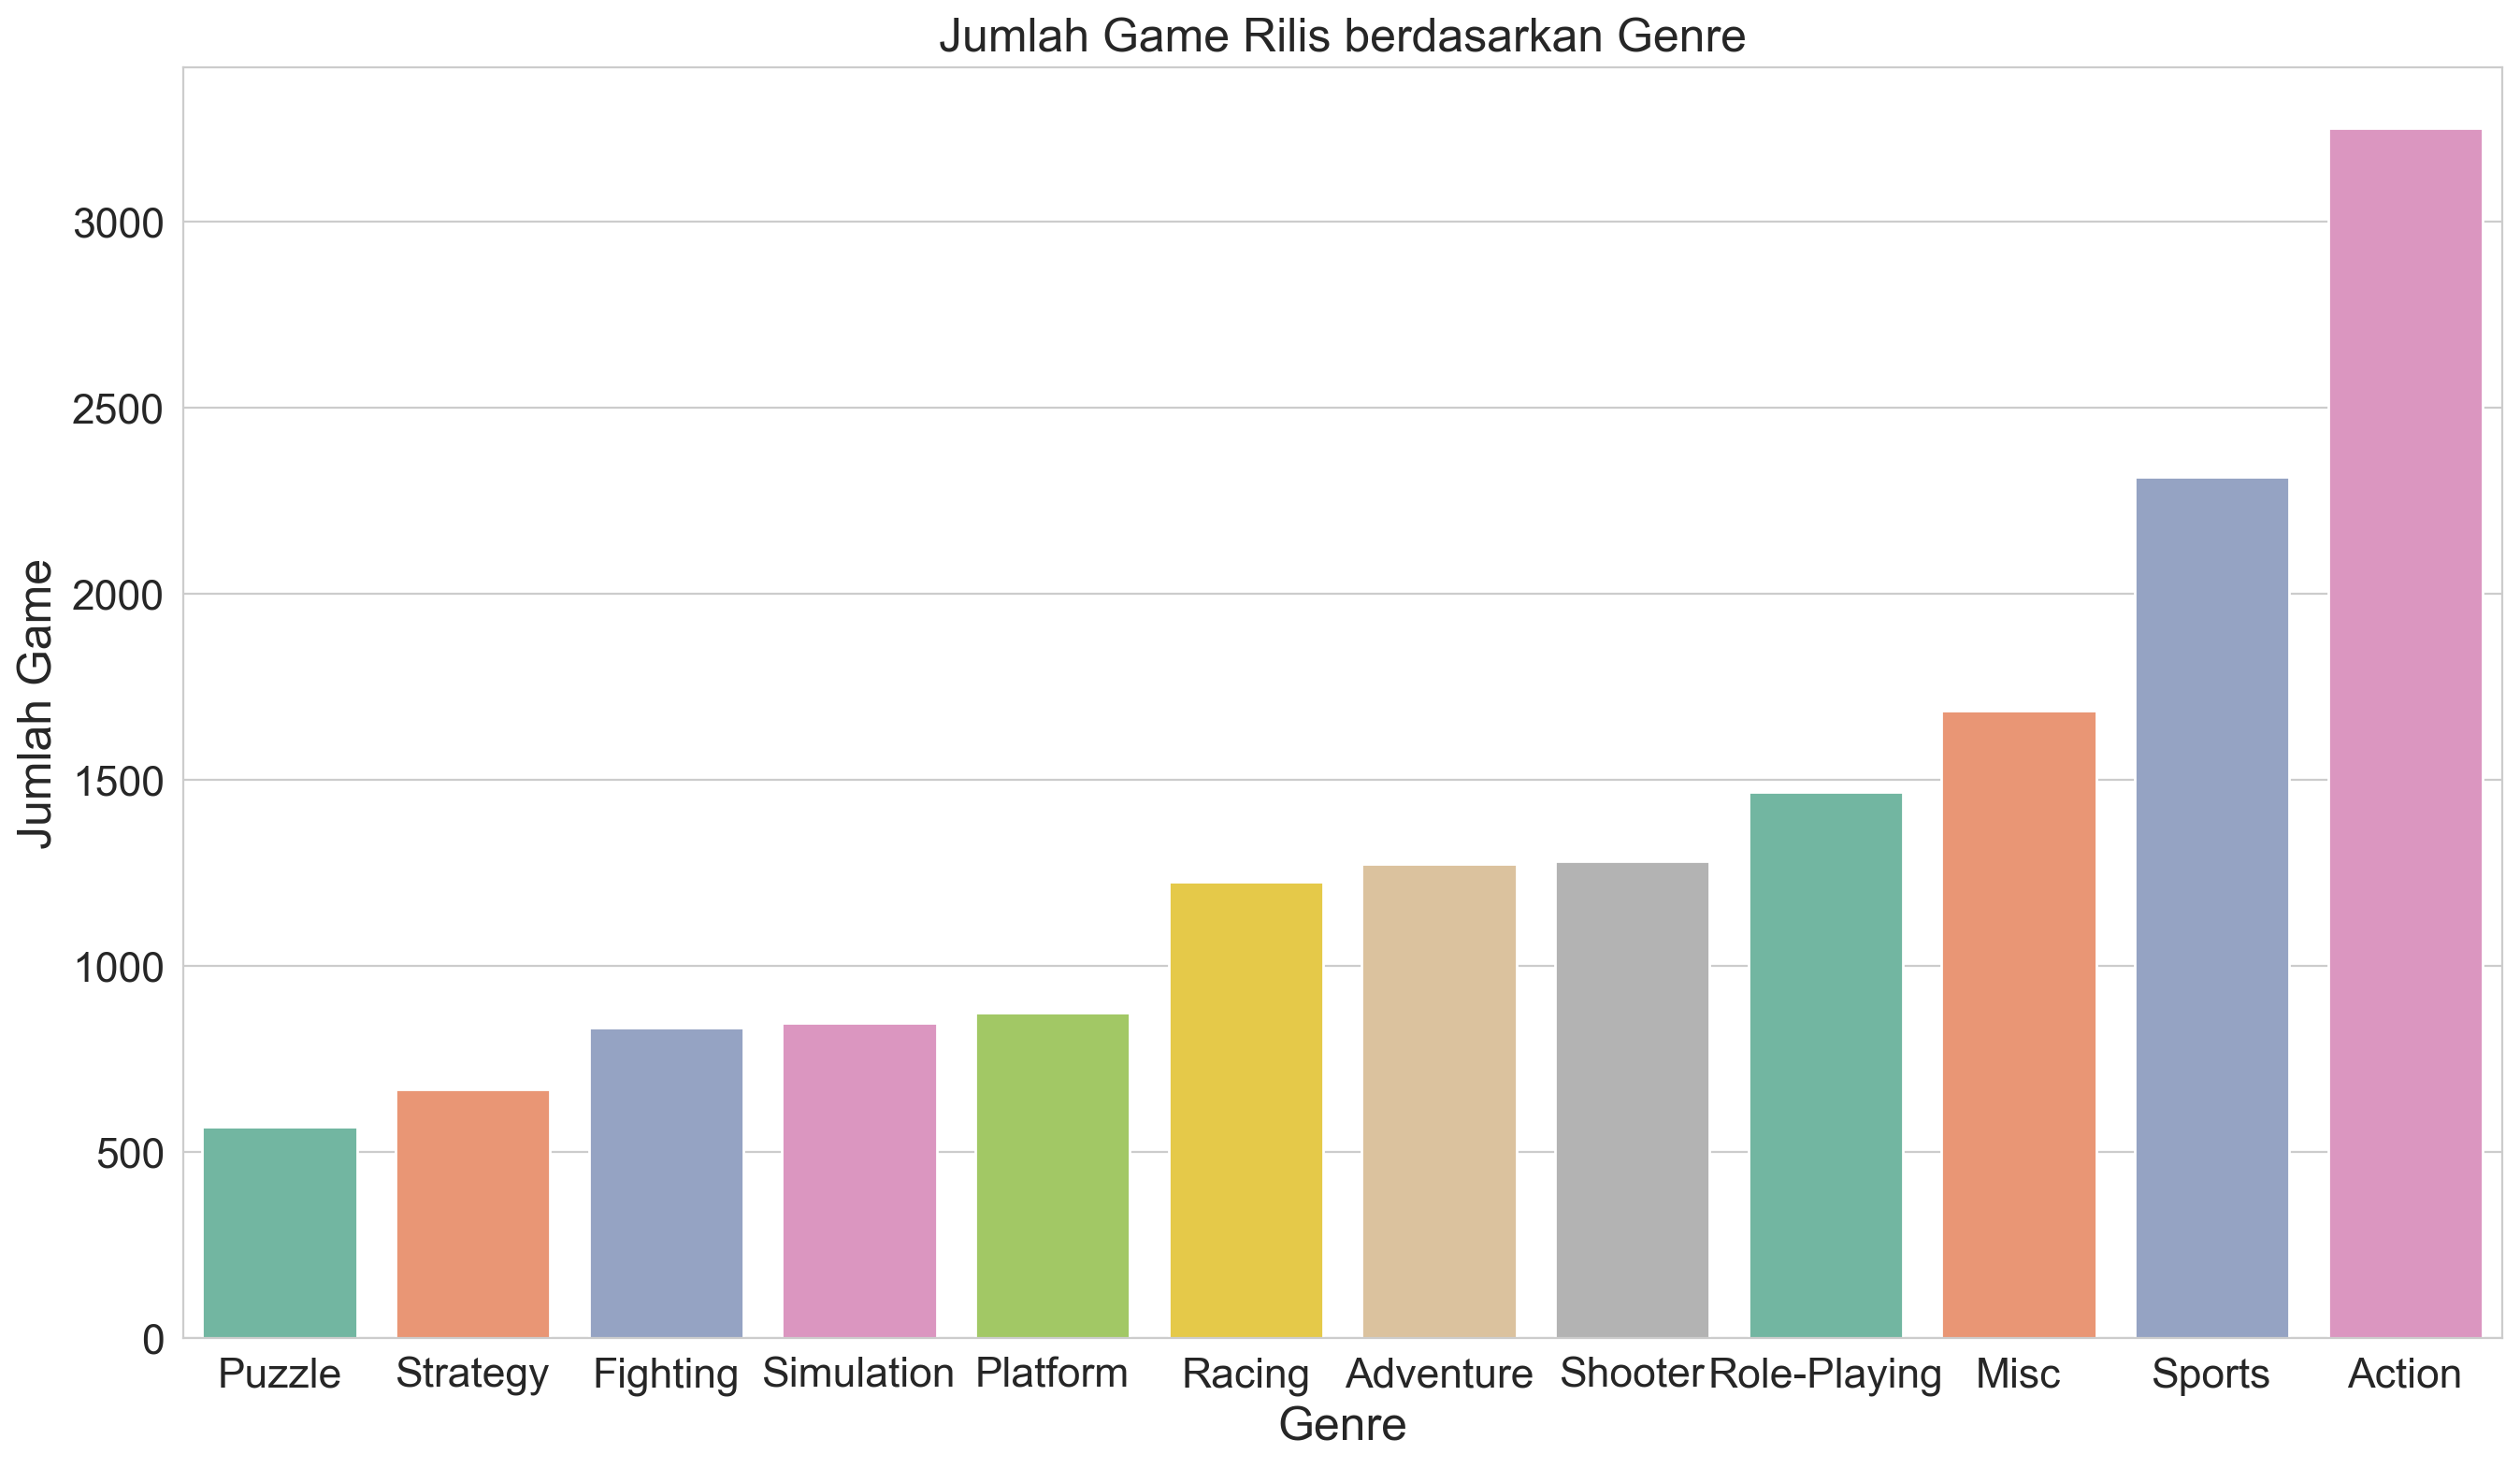

In [33]:
plt.figure(figsize = (16, 9))
sns.countplot(data = games, x = 'Genre', palette = 'Set2',
              order = games.groupby('Genre')['Name'].count().sort_values().index)
plt.ylabel('Jumlah Game', fontsize = 18)
plt.xlabel('Genre', fontsize = 18)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.title('Jumlah Game Rilis berdasarkan Genre', fontsize = 18)
plt.show();

- terlihat bahwa genre game yang paling banyak dirilis adalah Action, diikuti oleh Sports, Misc, dst.

#### Top 10 Platform dengan rilis game terbanyak

In [34]:
games_by_platform = games.groupby('Platform', as_index = False)['Name'].count().sort_values(by = 'Name', ascending = False).rename(columns = {'Name':'Jumlah Game'}).reset_index(drop = True)
games_by_platform.head(10)

,Platform,Jumlah Game
0,PS2,2133
1,DS,2131
2,PS3,1303
3,Wii,1290
4,X360,1236
5,PSP,1199
6,PS,1189
7,PC,939
8,XB,806
9,GBA,786


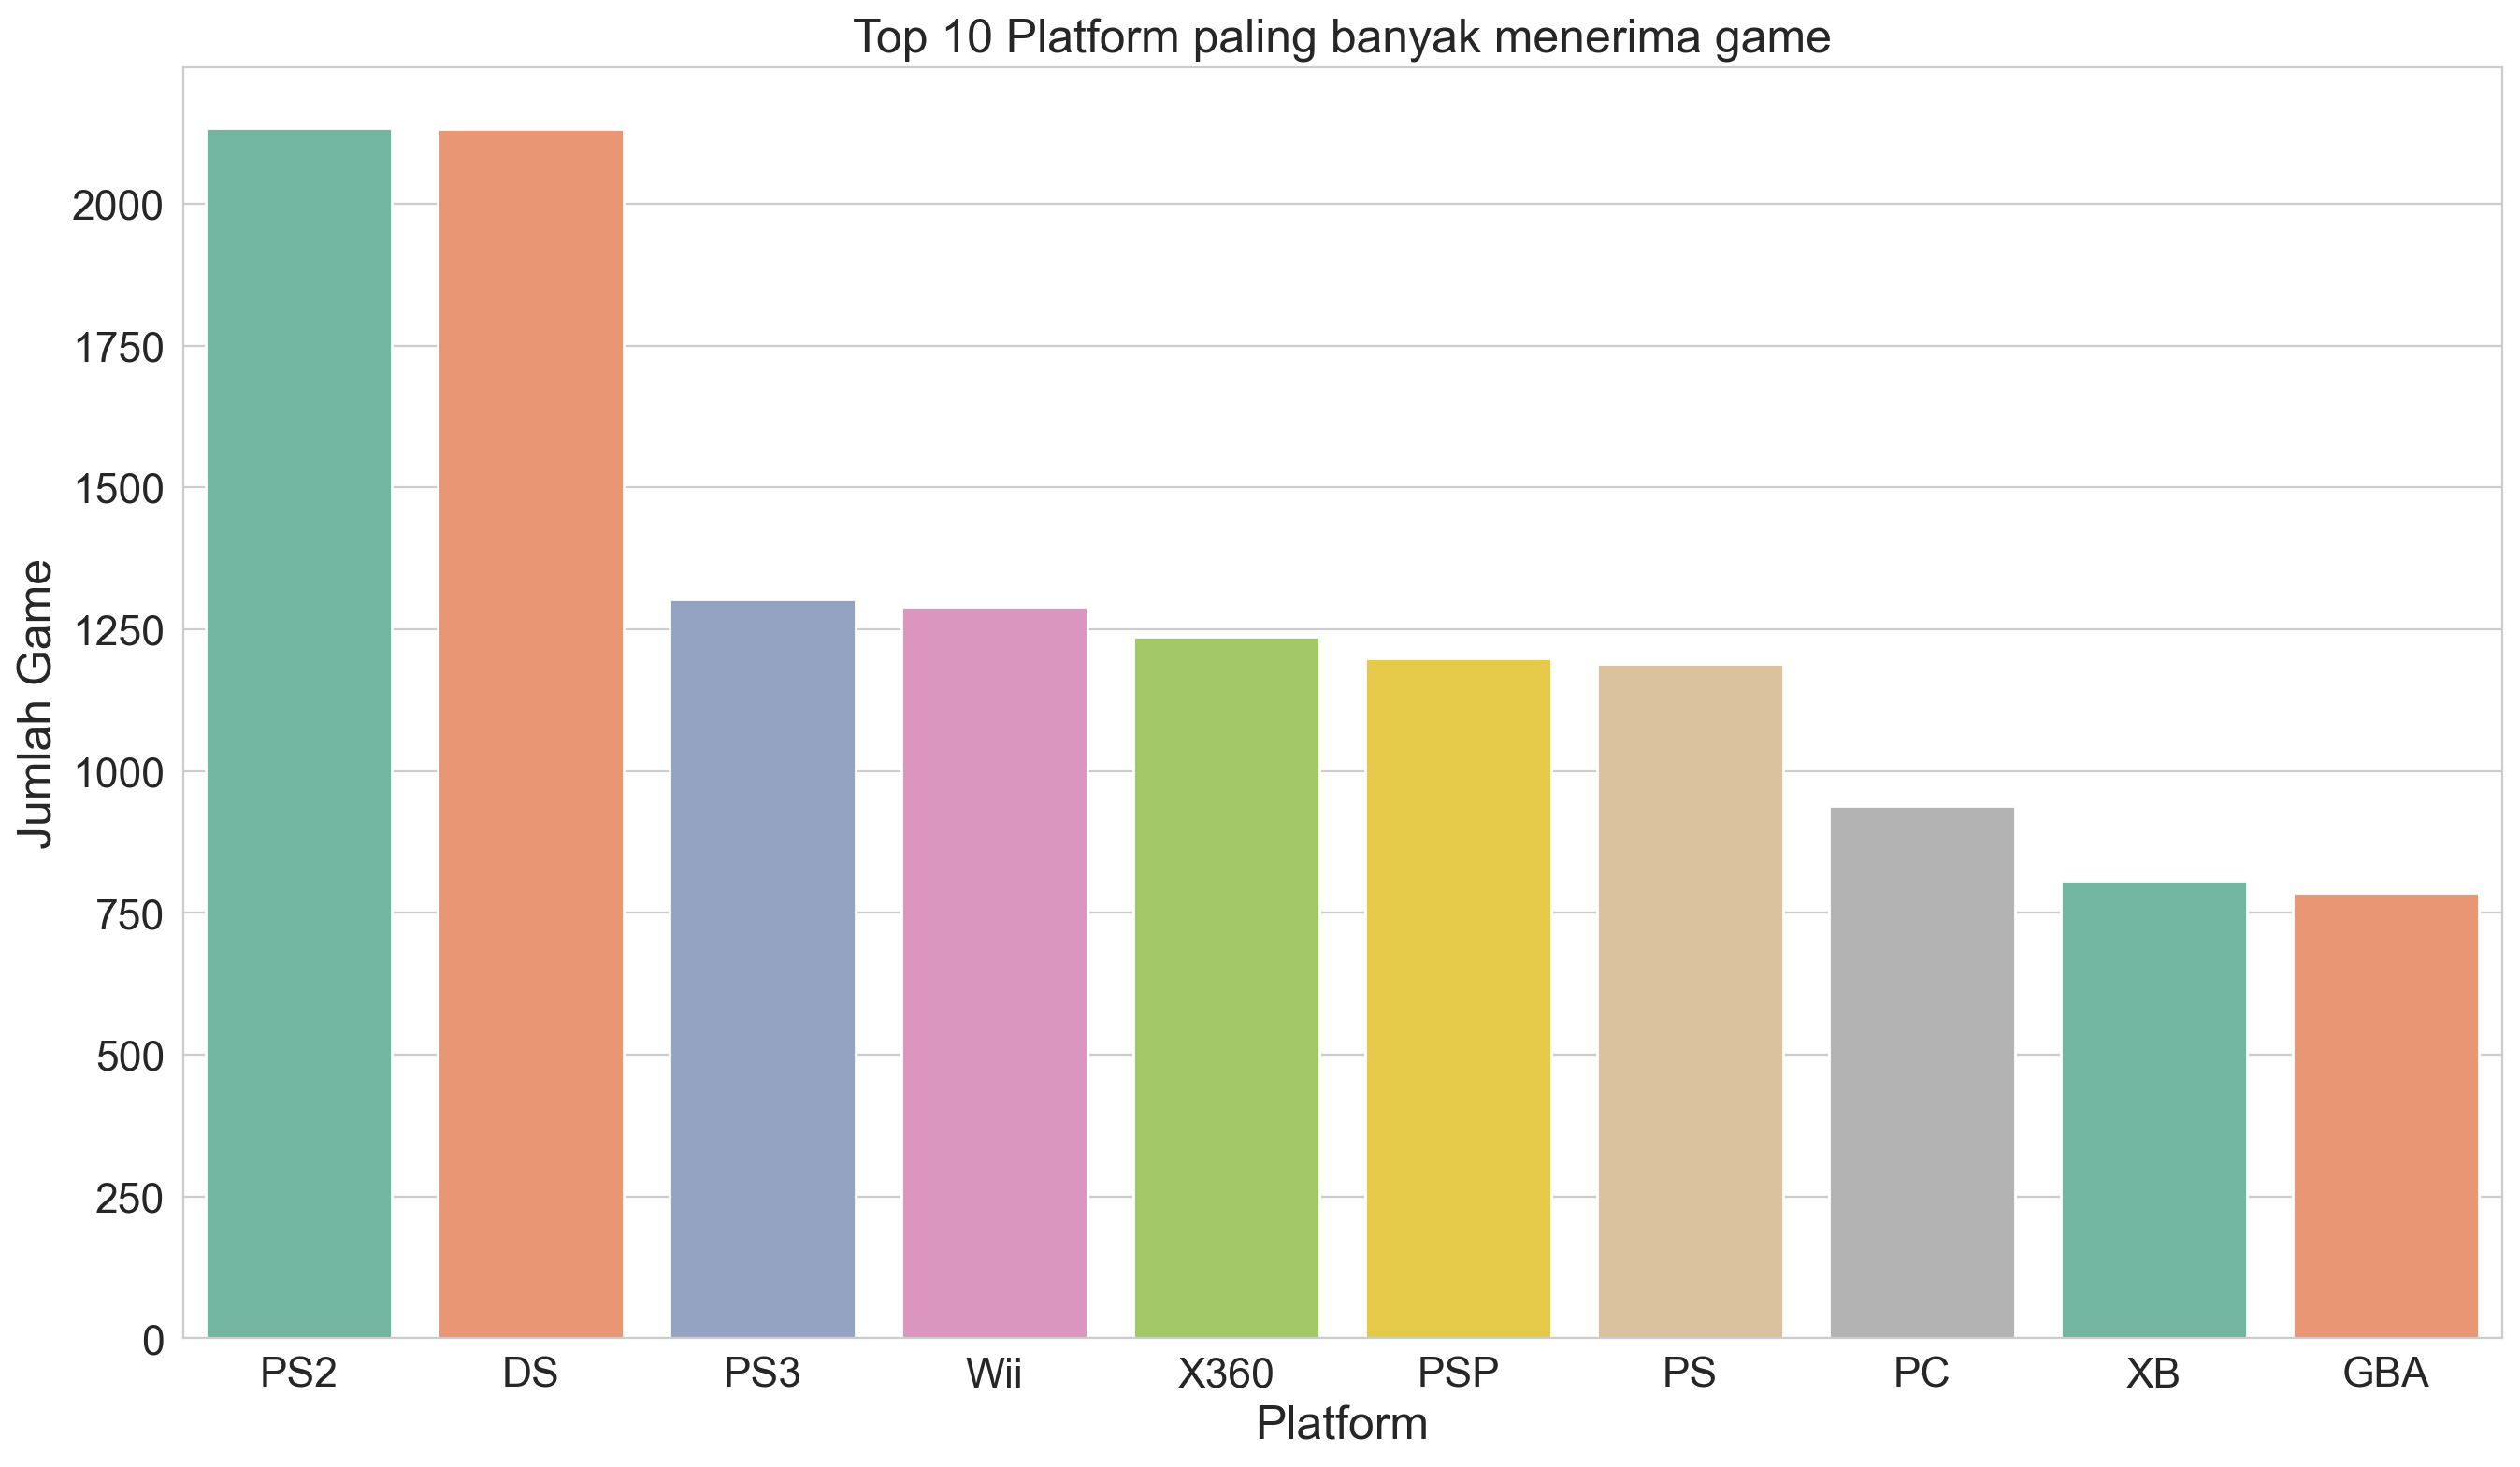

In [35]:
plt.figure(figsize = (16, 9))
sns.barplot(x = 'Platform', y = 'Jumlah Game', data = games_by_platform[0:10], palette = 'Set2')
plt.ylabel('Jumlah Game',fontsize = 18)
plt.xlabel('Platform',fontsize = 18)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.title('Top 10 Platform paling banyak menerima game', fontsize = 18)
plt.show();

- PS2 menjadi platform yang paling banyak menerima game hingga 2016, yaitu sebanyak 2133 game. Hanya berbeda sedikit dengan Nintendo DS yaitu sebanyak 2131 game.

### Analisis Penjualan Game

### Trend Penjualan tiap tahun

In [36]:
sales_by_year = games.groupby('Year', as_index = False).agg({'NA_Sales':'sum', 'EU_Sales':'sum', 'JP_Sales':'sum', 'Other_Sales':'sum', 'Global_Sales':'sum'})
sales_by_year_melt = sales_by_year.melt(id_vars='Year', var_name='Region', value_name='Sales')

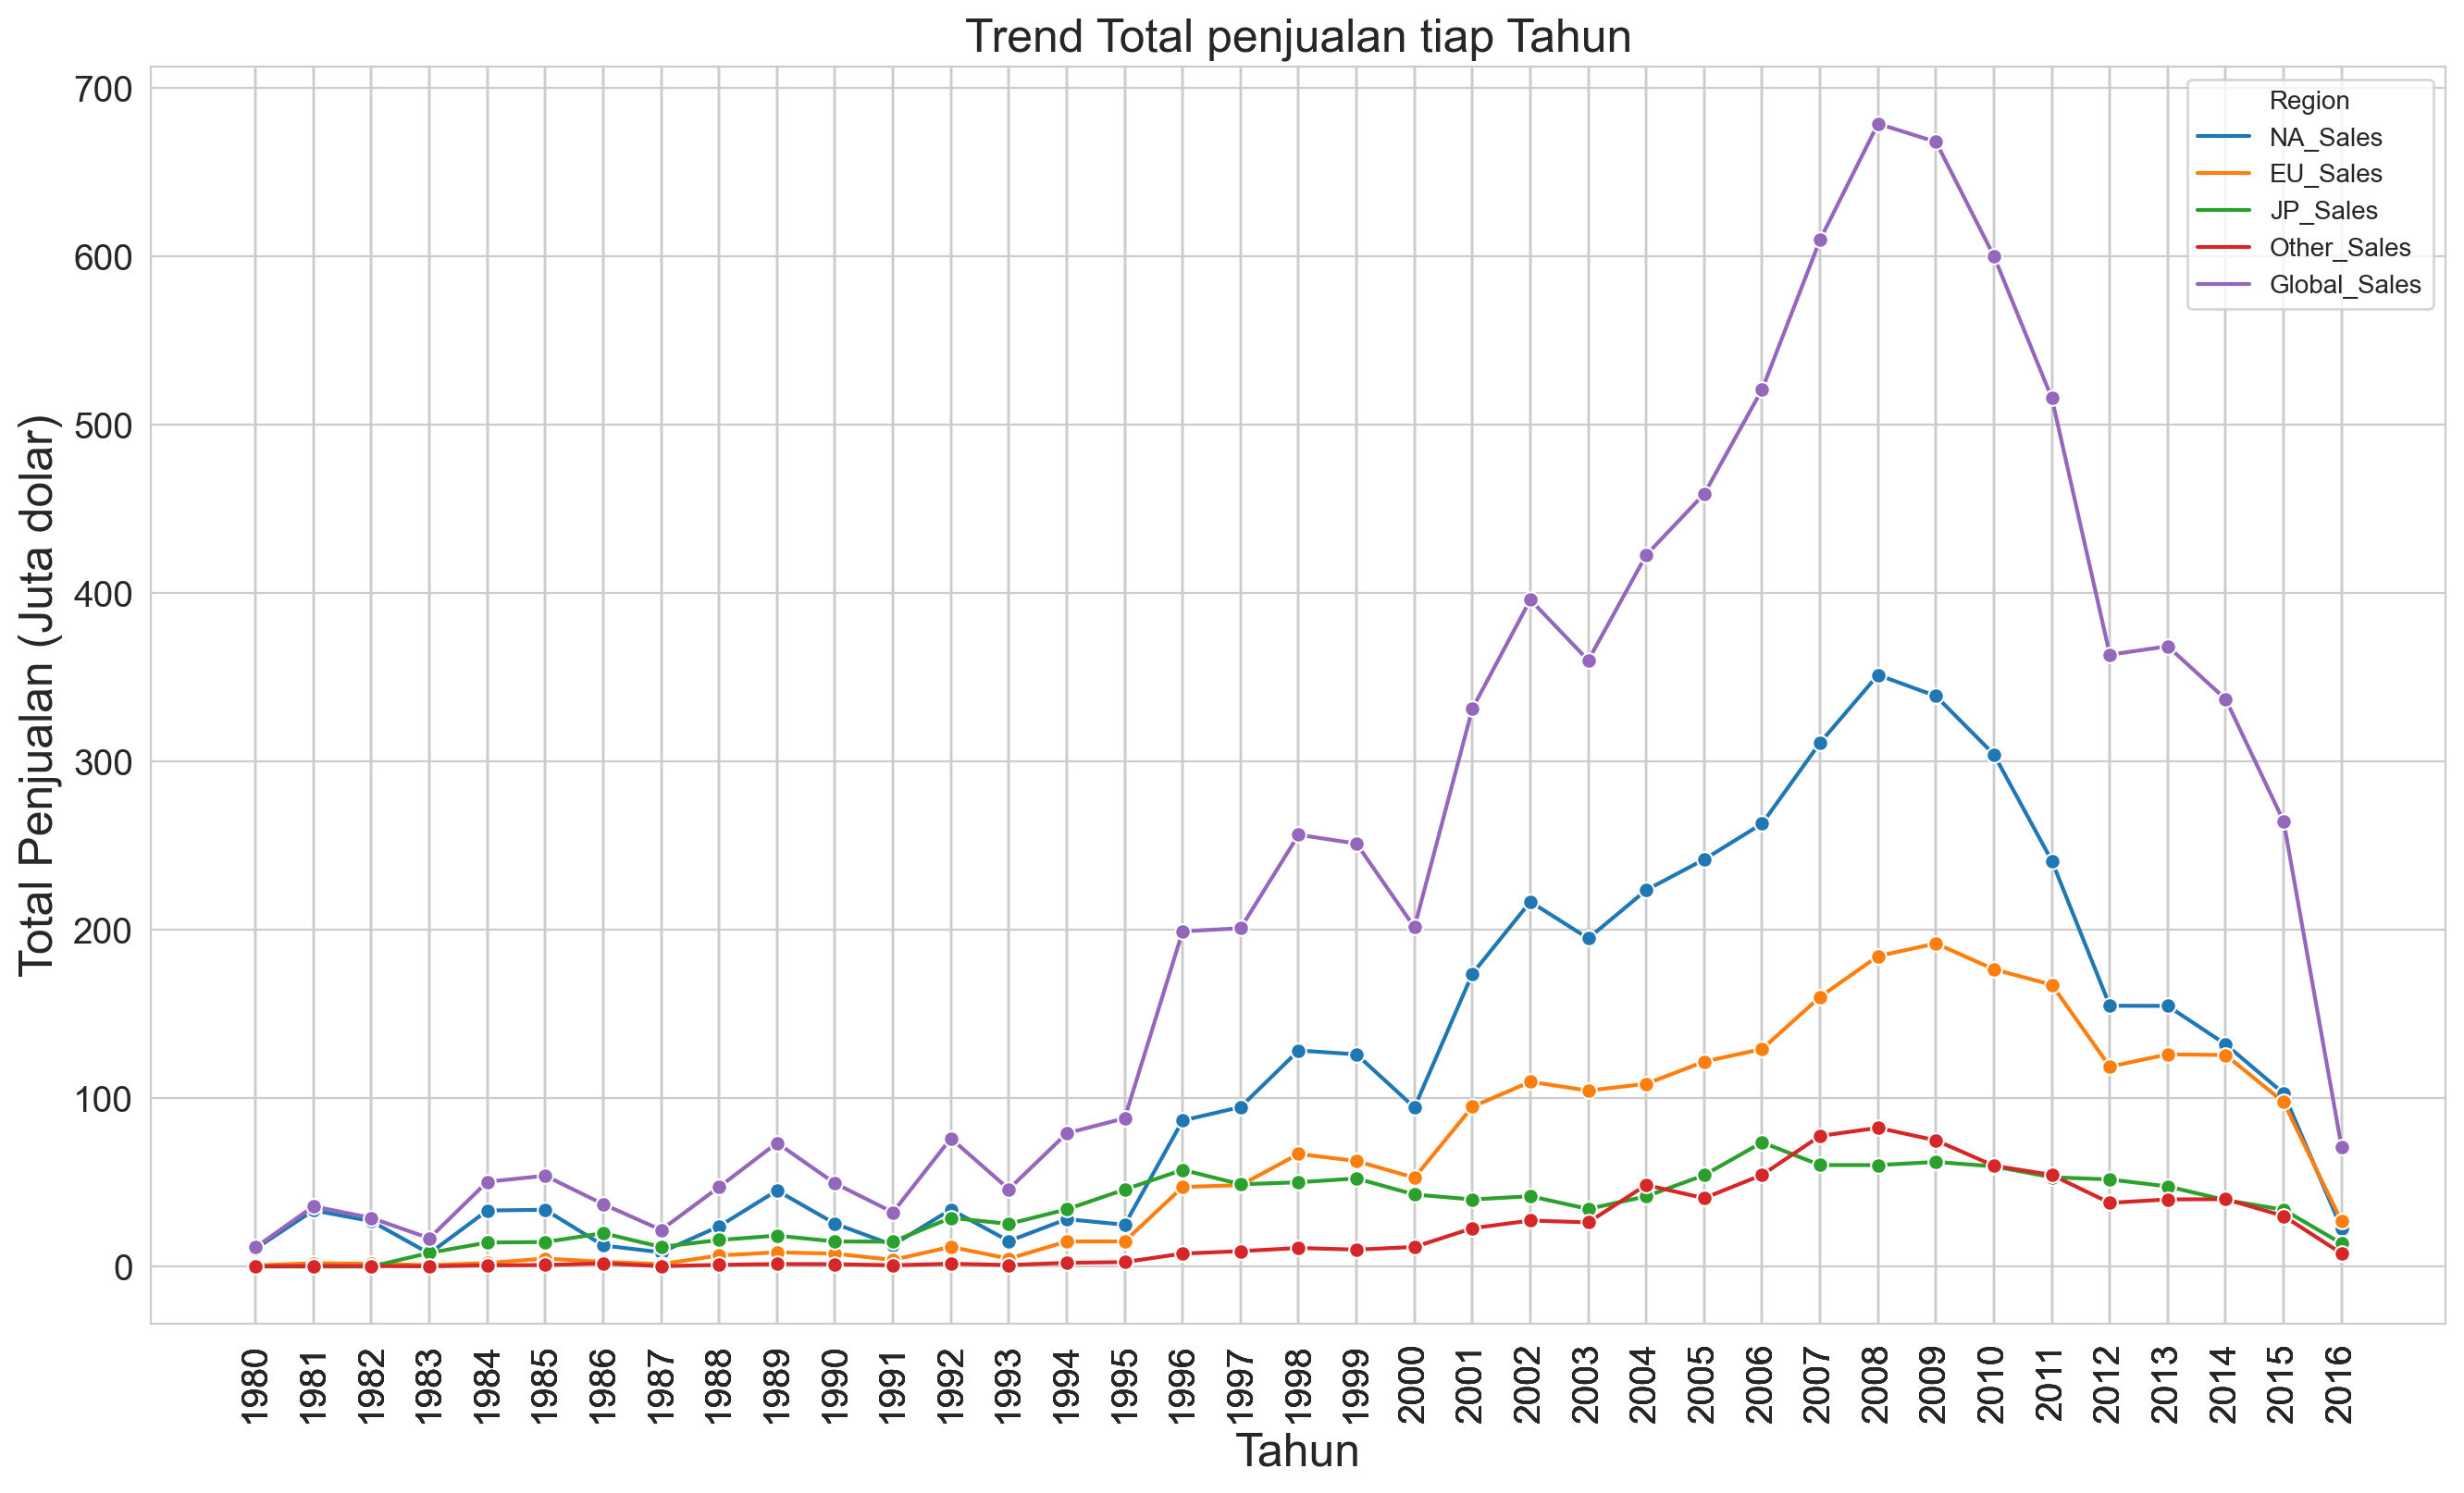

In [37]:
plt.figure(figsize = (16, 9))
ax = sns.lineplot(data = sales_by_year_melt, x = 'Year', y = 'Sales', hue = 'Region', palette = 'tab10', marker = 'o')
plt.ylabel('Total Penjualan (Juta dolar)', fontsize = 18)
plt.xlabel('Tahun', fontsize = 18)
ax.set(xticks=sales_by_year_melt.Year.values)
plt.xticks(fontsize= 14, rotation = 90)
plt.yticks(fontsize= 14)
plt.title('Trend Total penjualan tiap Tahun', fontsize = 18)
plt.show();

- Terlihat bahwa total penjualan mengikuti trend banyaknya game baru yang dirilis setiap tahunnya. Total penjualan secara global mencapai puncaknya pada tahun 2008. Trend penjualan secara global (Global_Sales) sangat identik dengan penjualan di Amerika utara (NA_Sales)
- Trend penjualan di eropa mencapai puncaknya pada tahun 2009, sedangkan di jepang puncak penjualannya terjadi pada tahun 2006
- Setelah tahun 2009 Untuk setiap region Trend penjualan game mengalami penurunan setiap tahun

### Game Terlaris

In [38]:
top_games = games.groupby('Name', as_index = False)[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index(drop = True)
top_games[['Name','Global_Sales']].sort_values('Global_Sales', ascending = False)[:10]

,Name,Global_Sales
10851,Wii Sports,82.74
3651,Grand Theft Auto V,55.92
9202,Super Mario Bros.,45.31
9582,Tetris,35.84
5493,Mario Kart Wii,35.82
10853,Wii Sports Resort,33.00
7247,Pokemon Red/Pokemon Blue,31.37
1210,Call of Duty: Modern Warfare 3,30.83
6633,New Super Mario Bros.,30.01
1206,Call of Duty: Black Ops II,29.72


In [39]:
# buat fungsi untuk plot data kategori
def cat_plot(data , feature1 , feature2 , col_feature, plot_type):
    plt.figure(figsize = (10,6))
    ax = sns.catplot(x = feature1, y = feature2 , data =data, \
                       col_wrap = 2, \
                       col = col_feature, \
                       kind = plot_type, \
                       ci = False, \
                       palette = sns.color_palette('colorblind'))
    ax.set_xticklabels(rotation = 90)
    plt.show()
    
    
def feature_sales(data, feature1, feature2, title, palette = 'colorblind'):
    plt.figure(figsize = (12, 6))
    sns.barplot(x = feature1, y = feature2, 
            data = data.sort_values(feature2, ascending = False)[:10], palette = palette)
    plt.ylabel('Total Penjualan (Juta dolar)', fontsize = 8)
    plt.xlabel(feature1, fontsize = 8)
    plt.xticks(fontsize= 8, rotation = 90)
    plt.yticks(fontsize= 8)
    plt.title(title, fontsize = 10)
    plt.show();
    
def sales_by(data, feature1, feature2, feature3, feature4, feature5, title):
    plt.figure(figsize = (12,8))

    plt.subplot(221)
    g1 = sns.barplot(x = feature1, y = feature2, data = data,
                     order = data[[feature1,feature2]].sort_values(feature2, ascending = False)[feature1][:10].values)
    g1.set_title(feature2, fontsize=10)
    plt.ylabel('Total Penjualan (Juta dolar)', fontsize = 8)
    plt.xticks(fontsize= 8, rotation = 60)
    plt.yticks(fontsize= 8)

    plt.subplot(224)
    g2 = sns.barplot(x = feature1, y = feature3, data = data,
                    order = data[[feature1,feature3]].sort_values(feature3, ascending = False)[feature1][:10].values)
    g2.set_title(feature3, fontsize=12)
    plt.ylabel('Total Penjualan (Juta dolar)', fontsize = 8)
    plt.xticks(fontsize= 8, rotation = 60)
    plt.yticks(fontsize= 8)    
    
    plt.subplot(223)
    g3 = sns.barplot(x = feature1, y = feature4, data = data,
                    order = data[[feature1,feature4]].sort_values(feature4, ascending = False)[feature1][:10].values)
    g3.set_title(feature4, fontsize=12)
    plt.ylabel('Total Penjualan (Juta dolar)', fontsize = 8)
    plt.xticks(fontsize= 8, rotation = 60)
    plt.yticks(fontsize= 8)

    plt.subplot(222)
    g4 = sns.barplot(x = feature1, y = feature5, data = data,
                    order = data[[feature1,feature5]].sort_values(feature5, ascending = False)[feature1][:10].values)
    g4.set_title(feature5, fontsize=12)
    plt.ylabel('Total Penjualan (Juta dolar)', fontsize = 8)
    plt.xticks(fontsize= 8, rotation = 60)
    plt.yticks(fontsize= 8)

    
    plt.subplots_adjust(wspace = 0.2, hspace = 1.2,top = 0.9)
    plt.suptitle(title)
    plt.show()

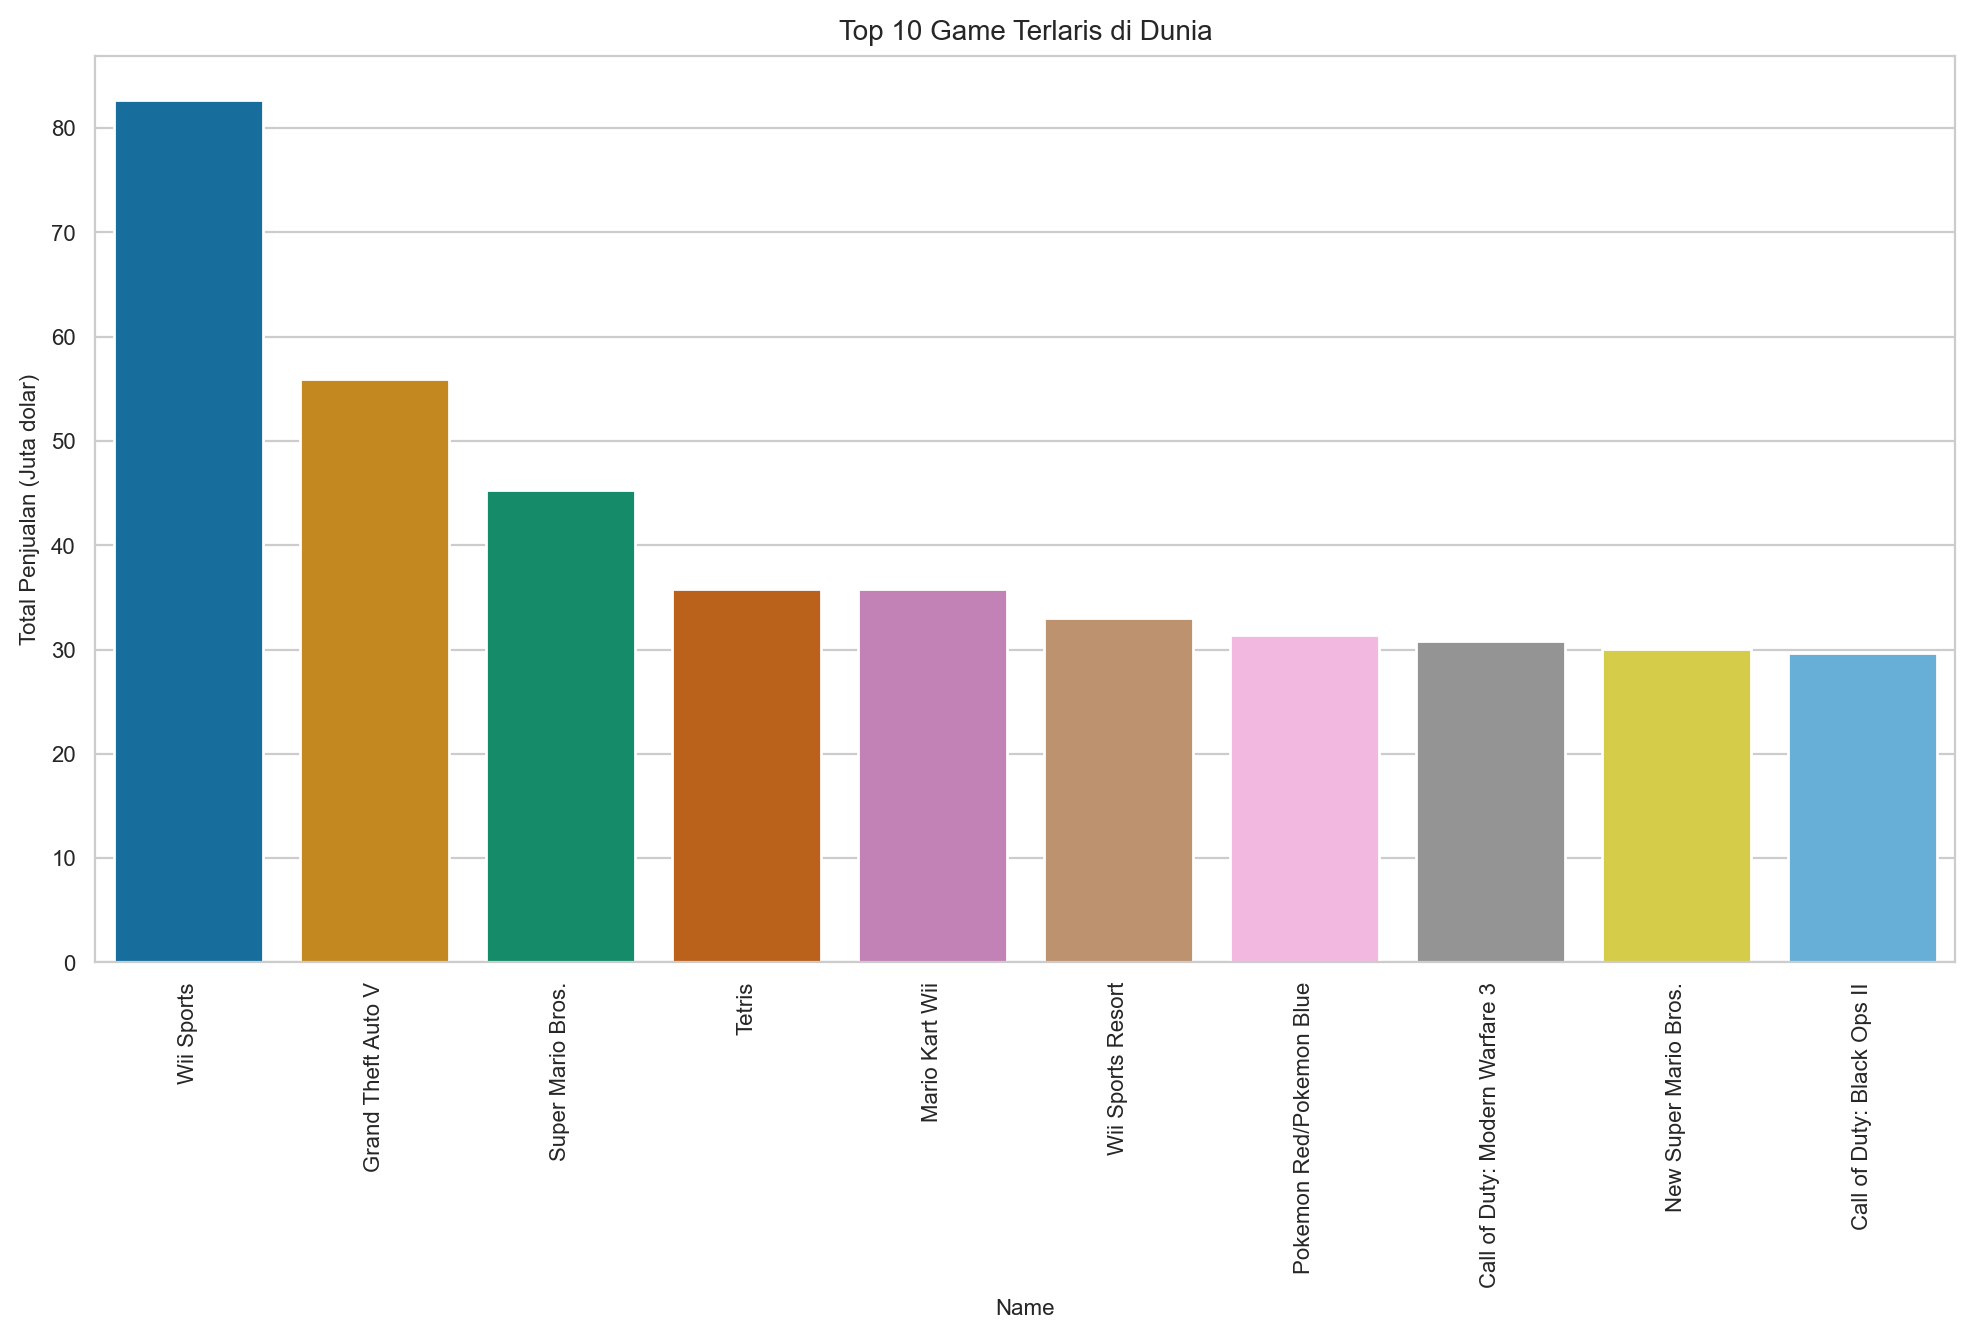

In [40]:
feature_sales(top_games, 'Name', 'Global_Sales', 'Top 10 Game Terlaris di Dunia')

- Game terlaris di dunia adalah Wii Sports dengan total penjualan 82.74 Juta dolar. Di rank kedua dan ketiga ditempati GTA V dan Super Mario Bros.

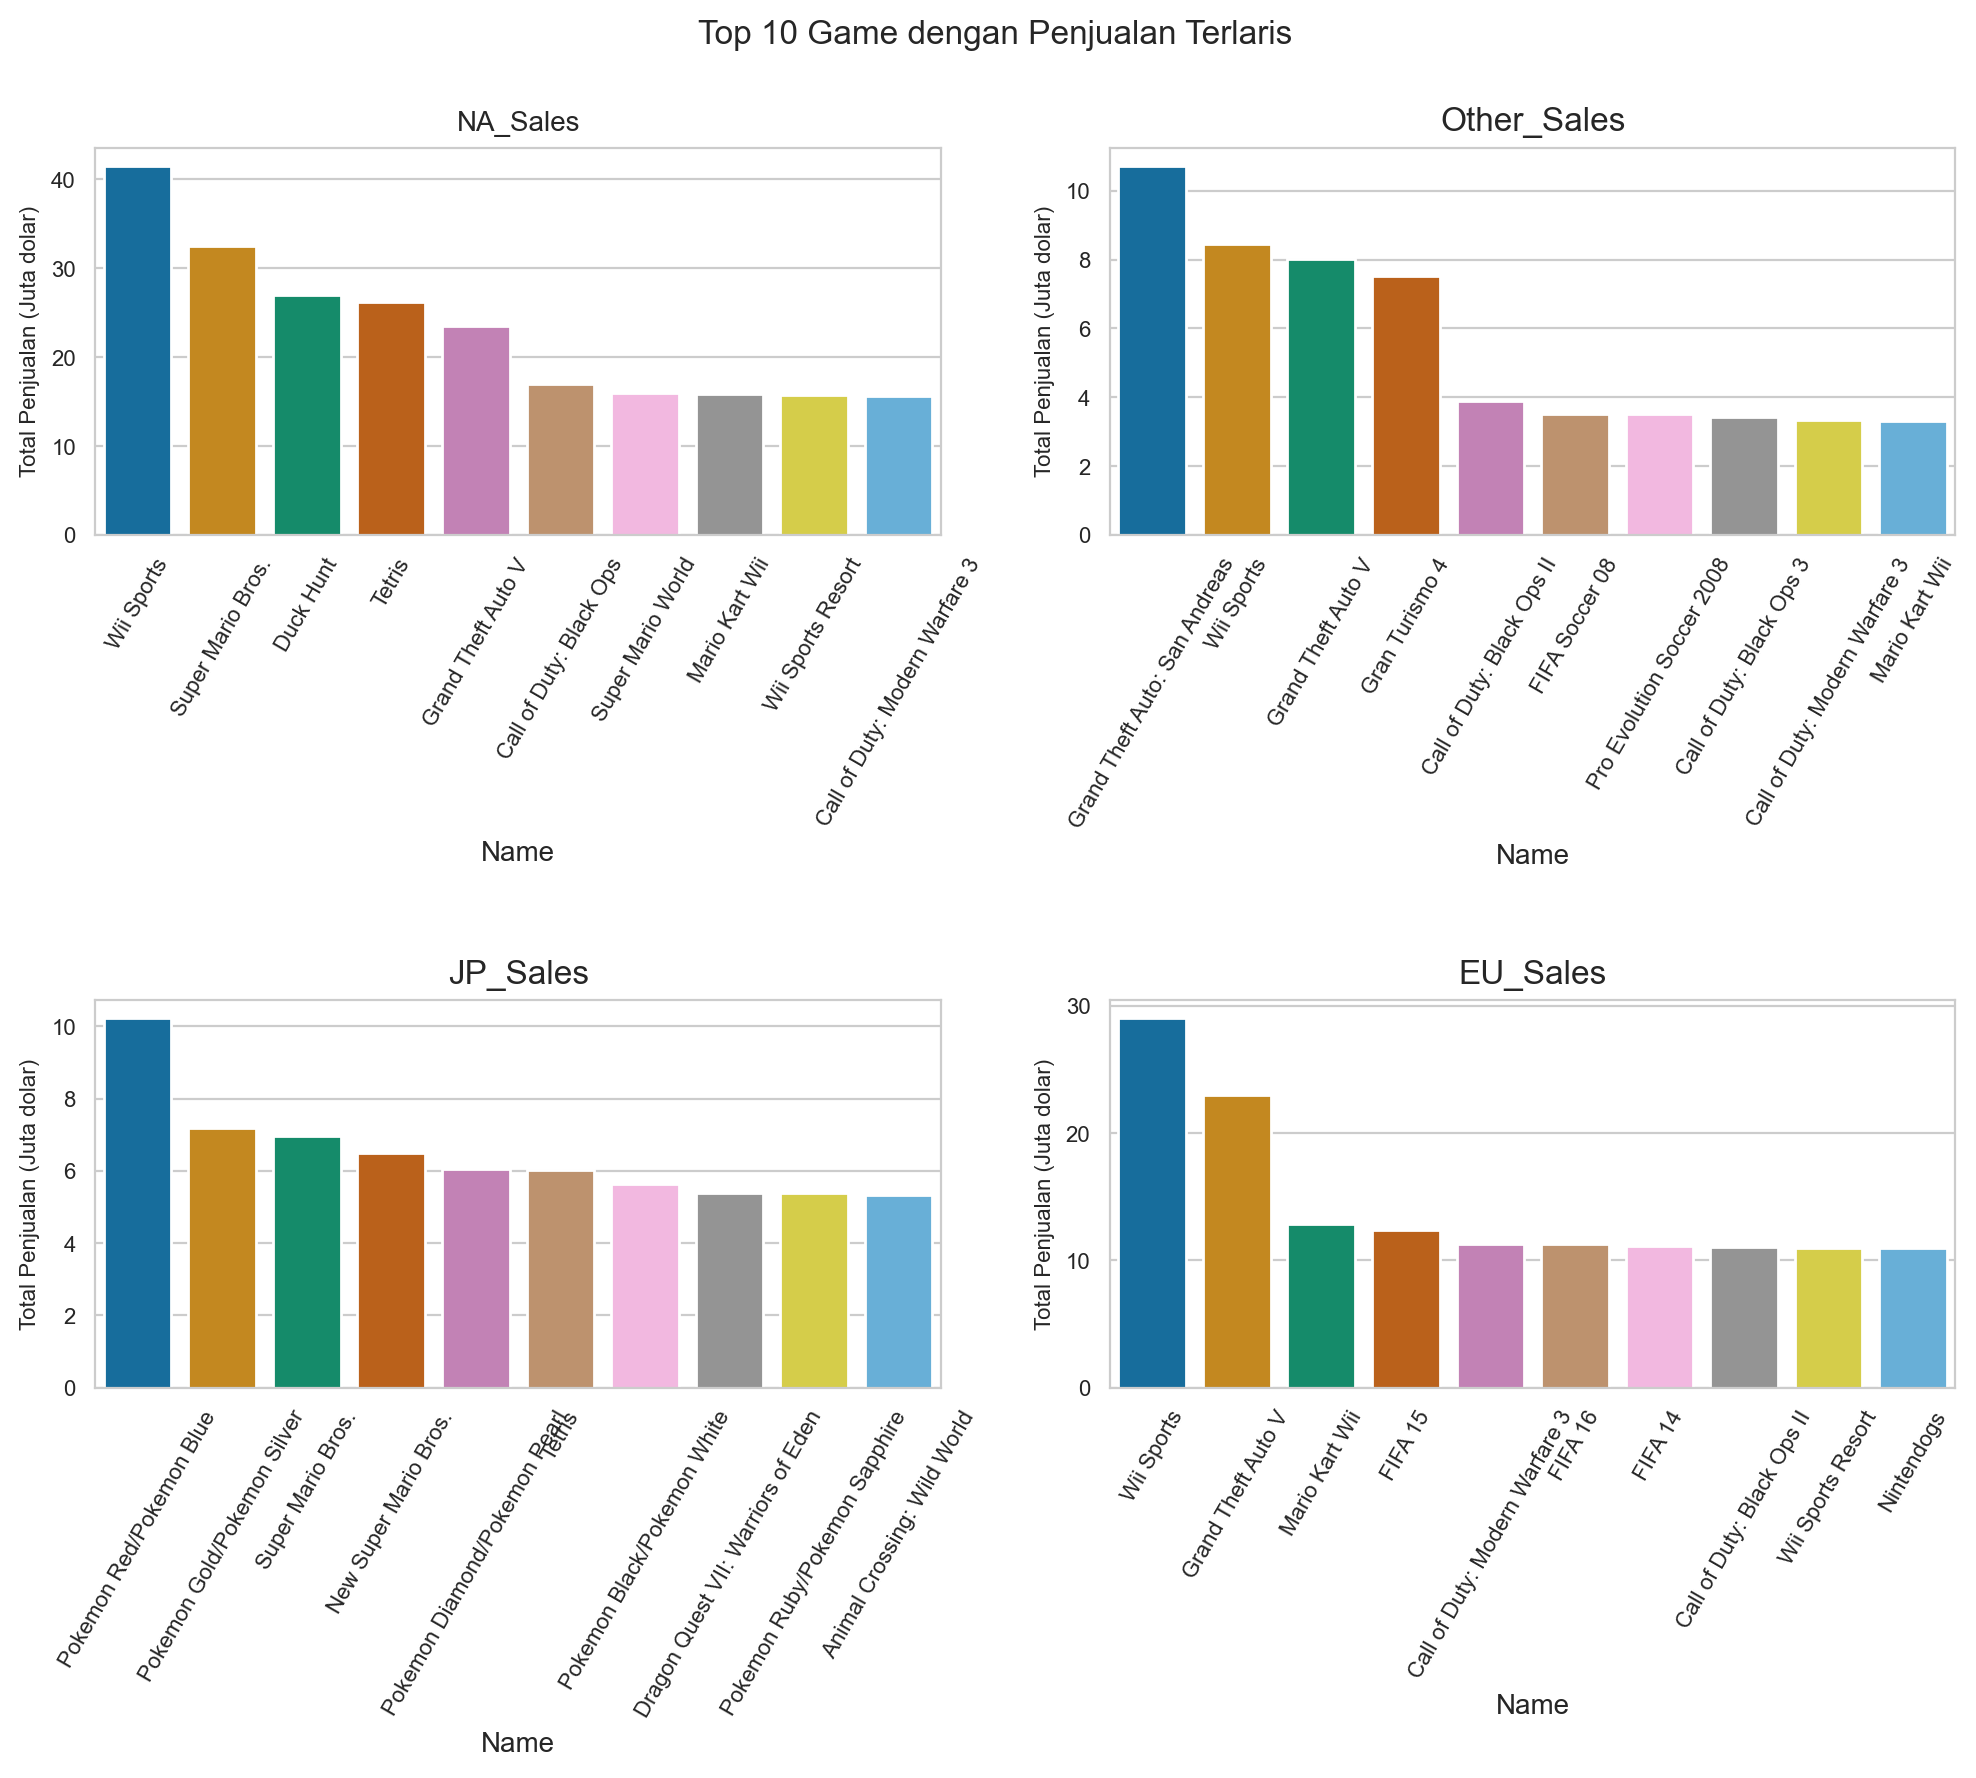

In [41]:
sales_by(top_games, 'Name', 'NA_Sales','EU_Sales','JP_Sales', 'Other_Sales', 'Top 10 Game dengan Penjualan Terlaris')

- Walaupun top 3 game terlaris di dunia adalah Wii Sports, GTA V dan Super Mario Bross, namun ketika kita lihat per region, ternyata setiap region memiliki ranking 10 game terlaris yang berbeda

### Trend Penjualan tiap tahun per genre

In [42]:
trend_sales_genre = games.groupby(['Year', 'Genre'], as_index = False)['Global_Sales'].sum()

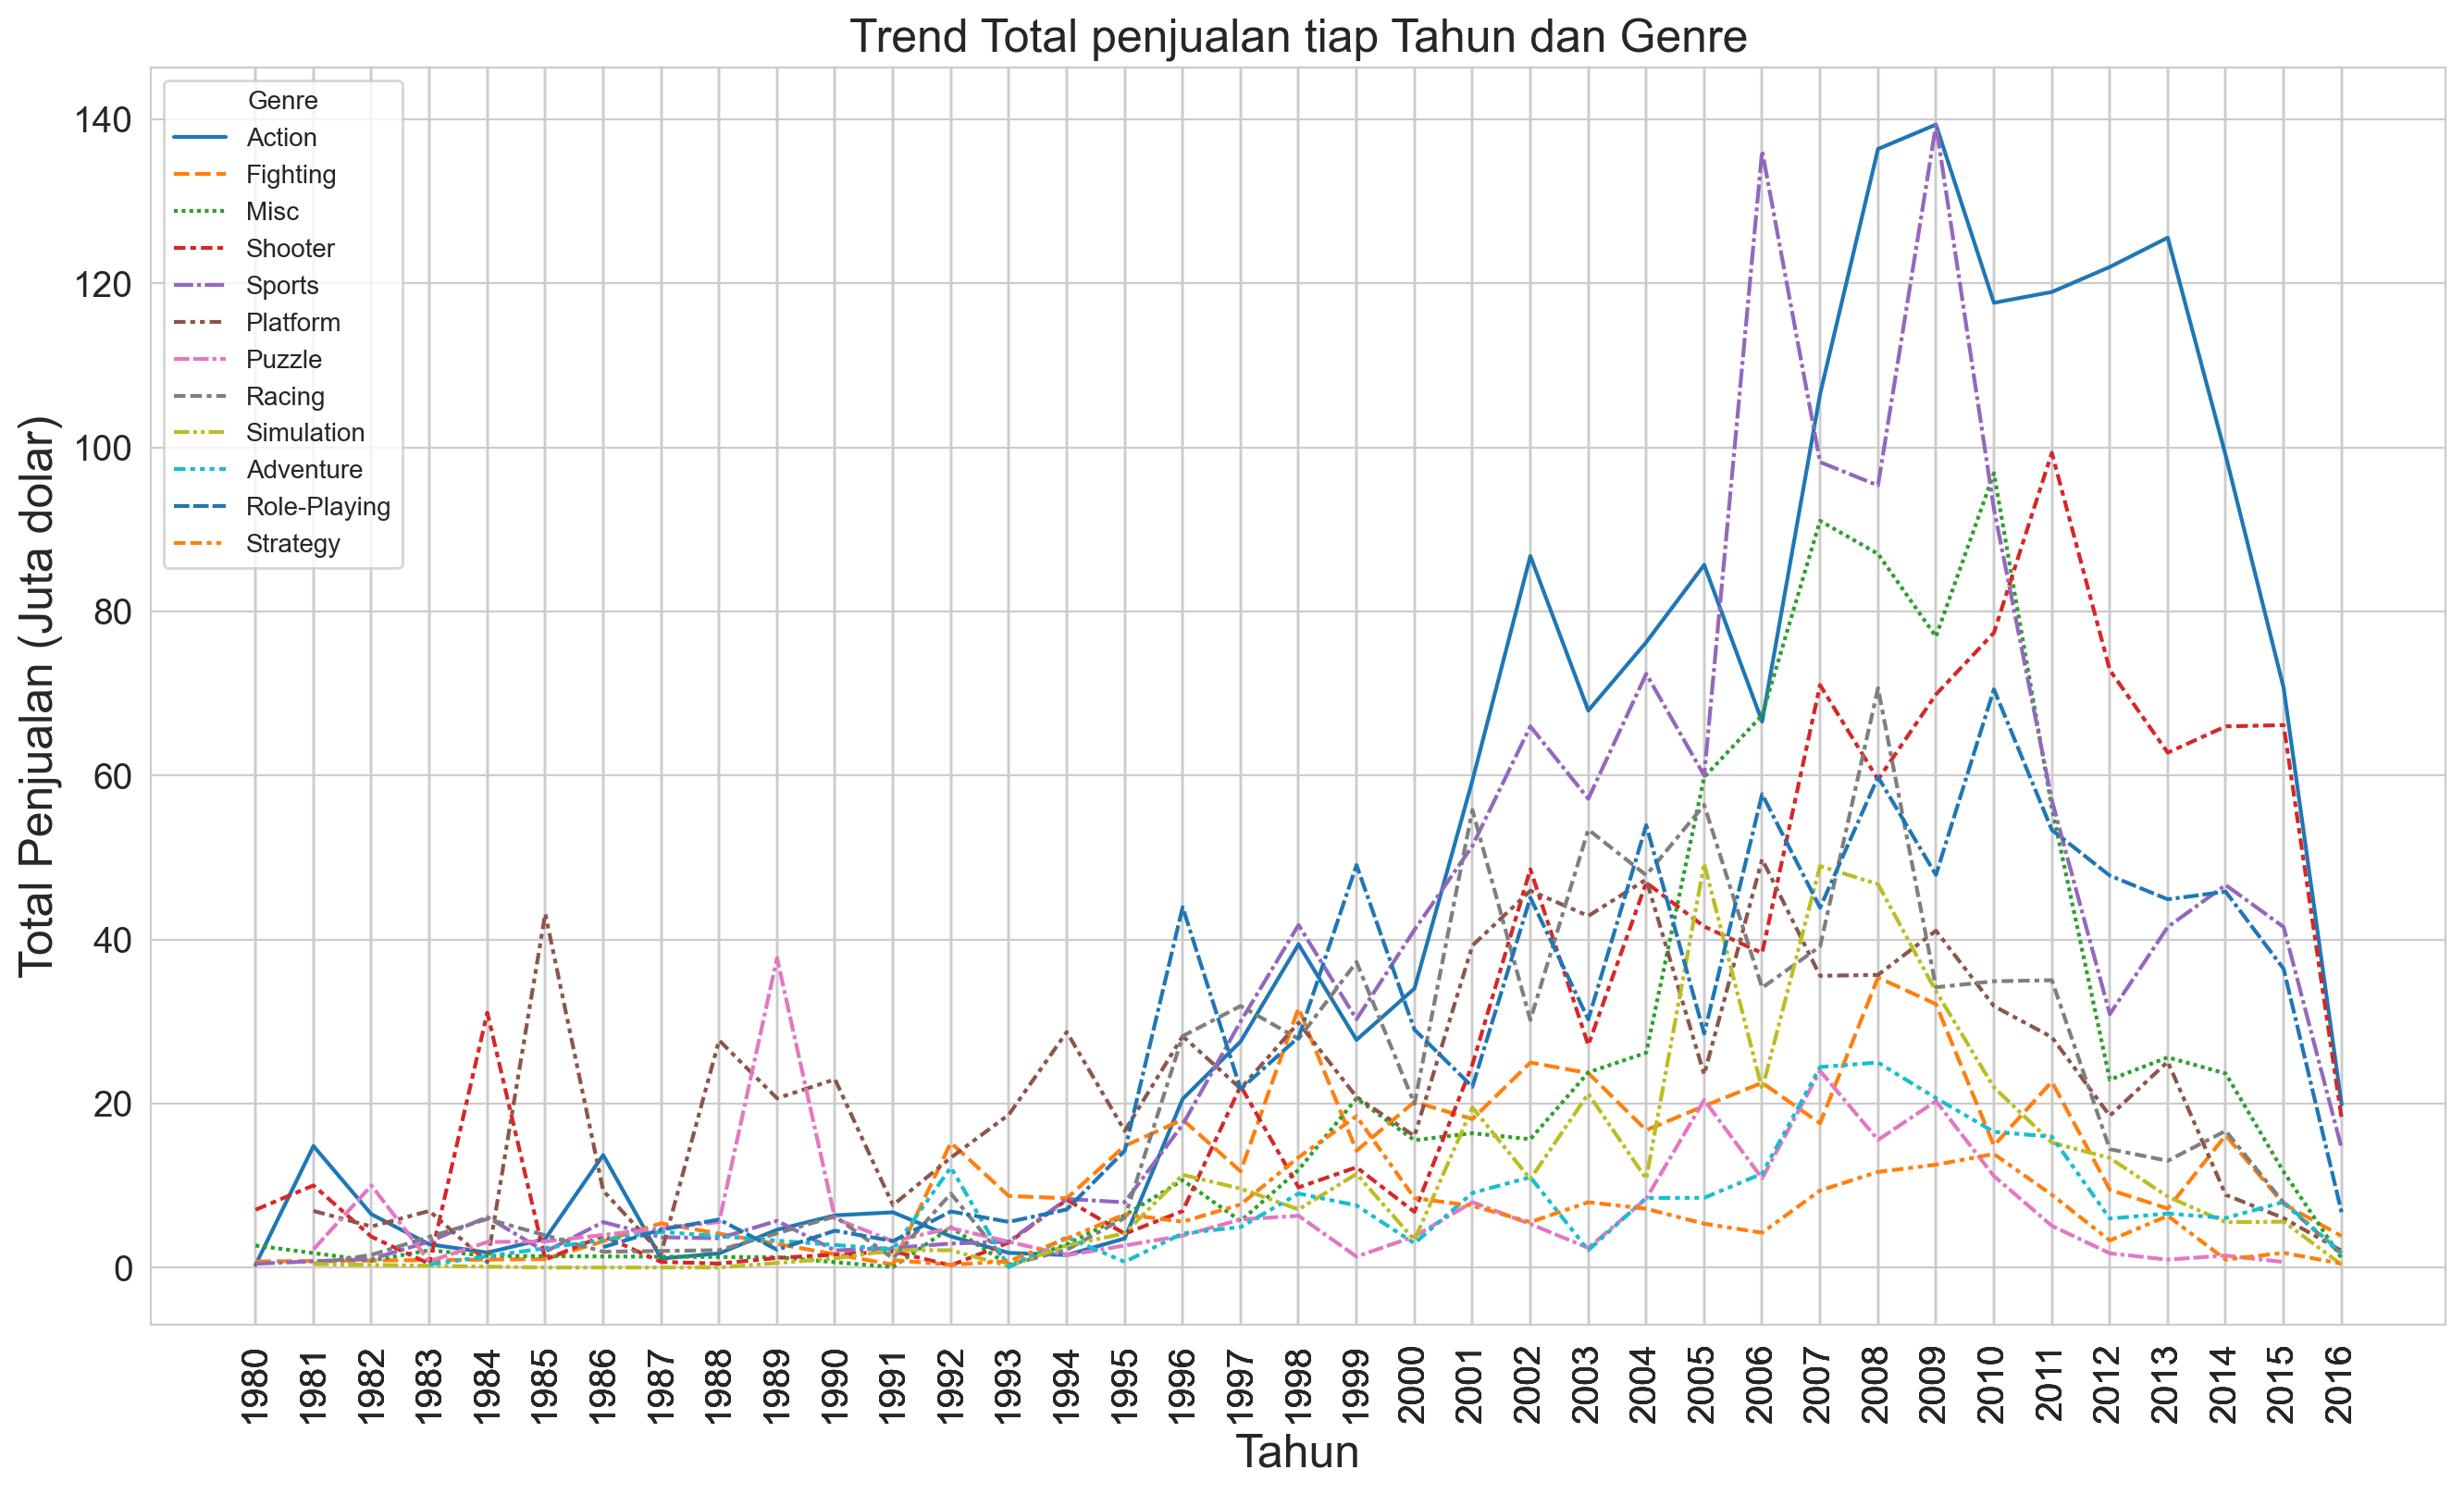

In [43]:
plt.figure(figsize = (16, 9))
ax = sns.lineplot(data = trend_sales_genre, x = 'Year', y = 'Global_Sales', hue = 'Genre', palette = 'tab10', style = 'Genre')
plt.ylabel('Total Penjualan (Juta dolar)', fontsize = 18)
plt.xlabel('Tahun', fontsize = 18)
ax.set(xticks=sales_by_year_melt.Year.values)
plt.xticks(fontsize= 14, rotation = 90)
plt.yticks(fontsize= 14)
plt.title('Trend Total penjualan tiap Tahun dan Genre', fontsize = 18)
plt.show();

- Penjualan game berdasarkan genre sangat dinamis setiap tahunnya. Hampir semua genre mencapai puncak penjualan di rentang tahun 2006-2009. Namun setelah 2011 terjadi penurunan penjualan game untuk seluruh genre

### Penjualan Game Terlaris Berdasarkan Genre

In [44]:
top_genre = games.groupby('Genre', as_index = False)[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index(drop = True)
top_genre[['Genre','Global_Sales']].sort_values('Global_Sales', ascending = False).head(10)

,Genre,Global_Sales
0,Action,1723.19
10,Sports,1320.91
8,Shooter,1026.20
7,Role-Playing,923.79
4,Platform,829.13
3,Misc,789.87
6,Racing,728.07
2,Fighting,444.05
9,Simulation,389.69
5,Puzzle,242.21


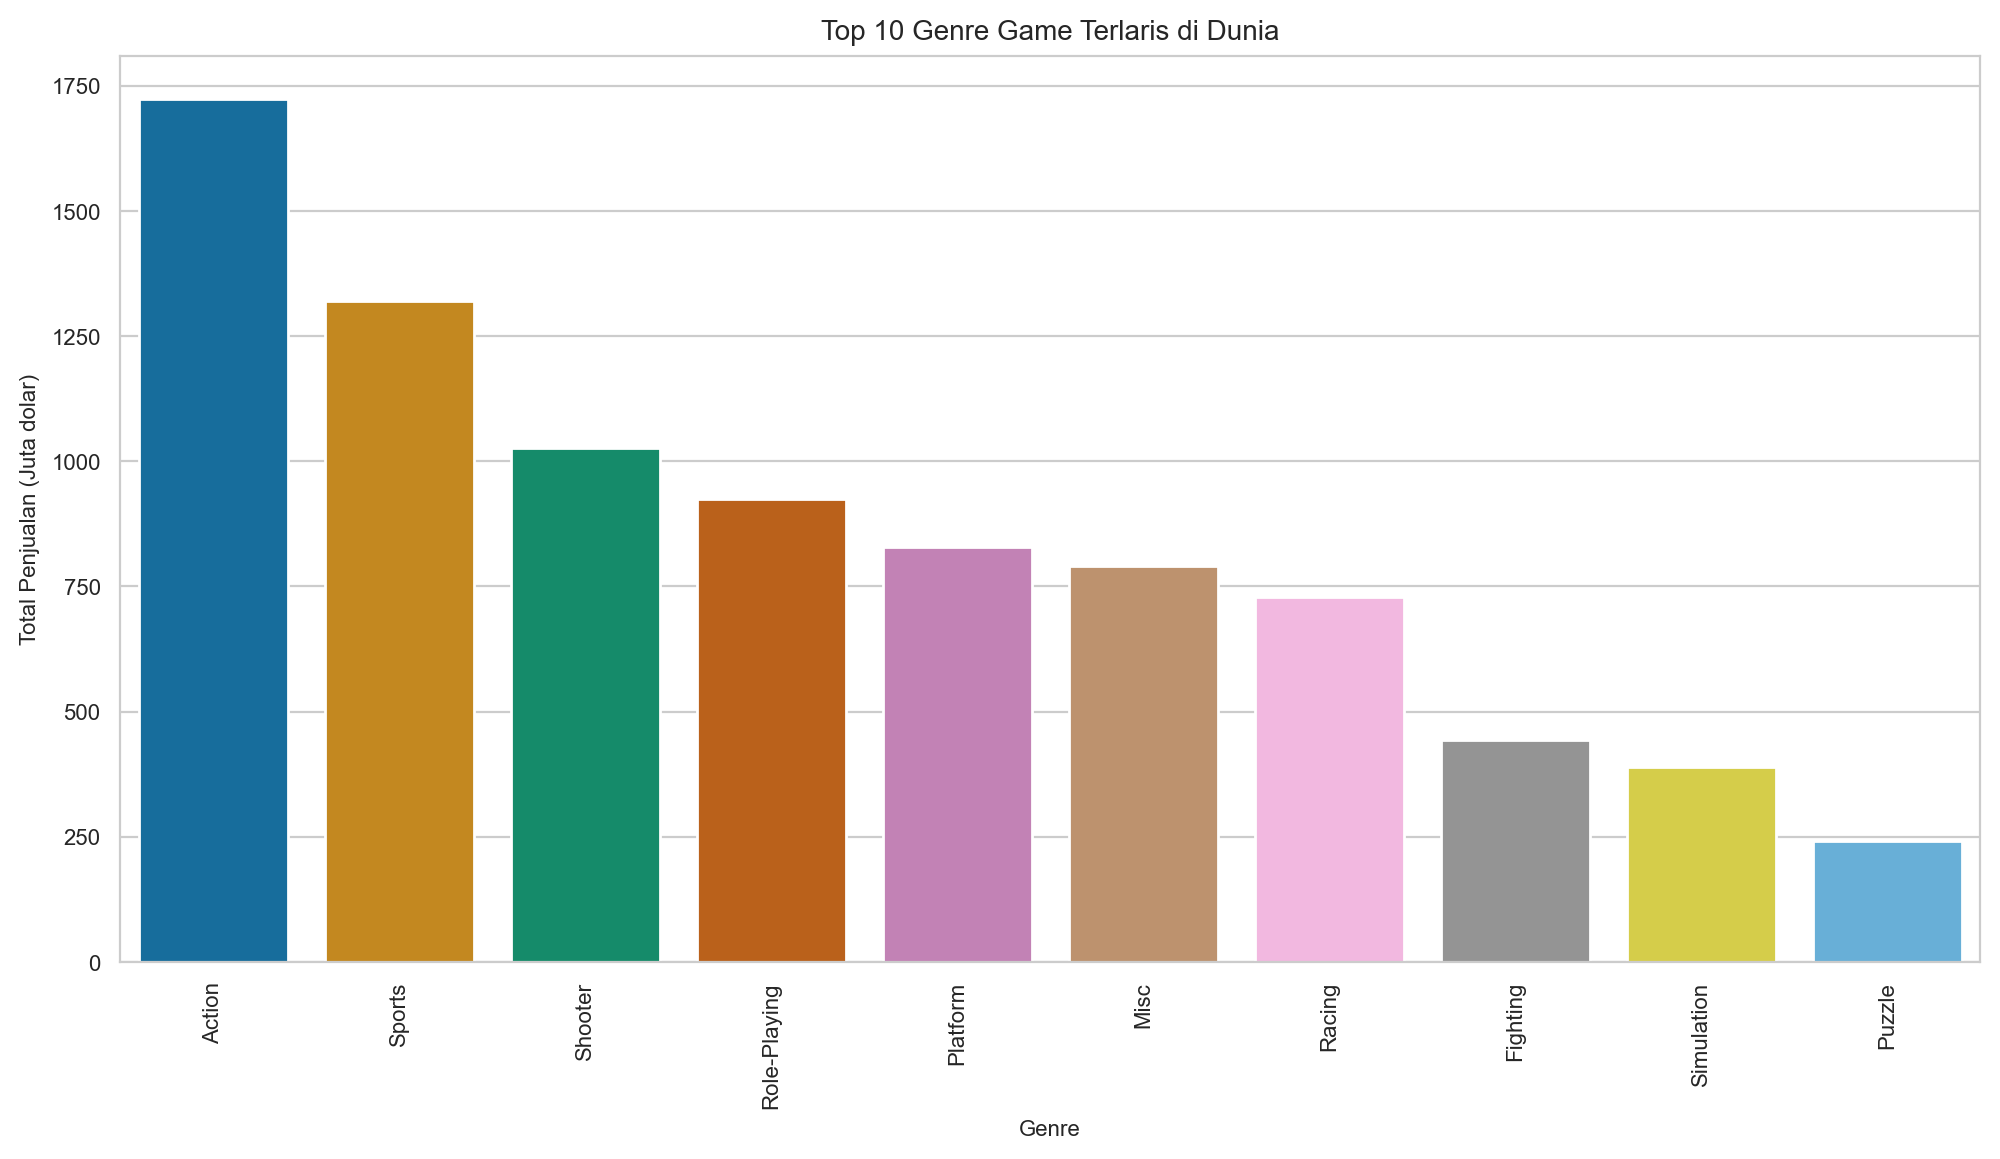

In [45]:
feature_sales(top_genre, 'Genre', 'Global_Sales', 'Top 10 Genre Game Terlaris di Dunia')

- Game dengan genre Action menjadi yang terlaris di seluruh dunia dengan total penjualan melebihi 1.7 milyar dolar, diikutin dengan penjualan game bergenre Sports, dan Shooter

#### Penjualan game terlaris berdasarkan genre tiap region

In [46]:
genre = games[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
genre = genre.groupby('Genre').sum().reset_index()

In [47]:
genre_melt = genre.melt(id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Region', value_name='Sales')

<Figure size 2000x1200 with 0 Axes>

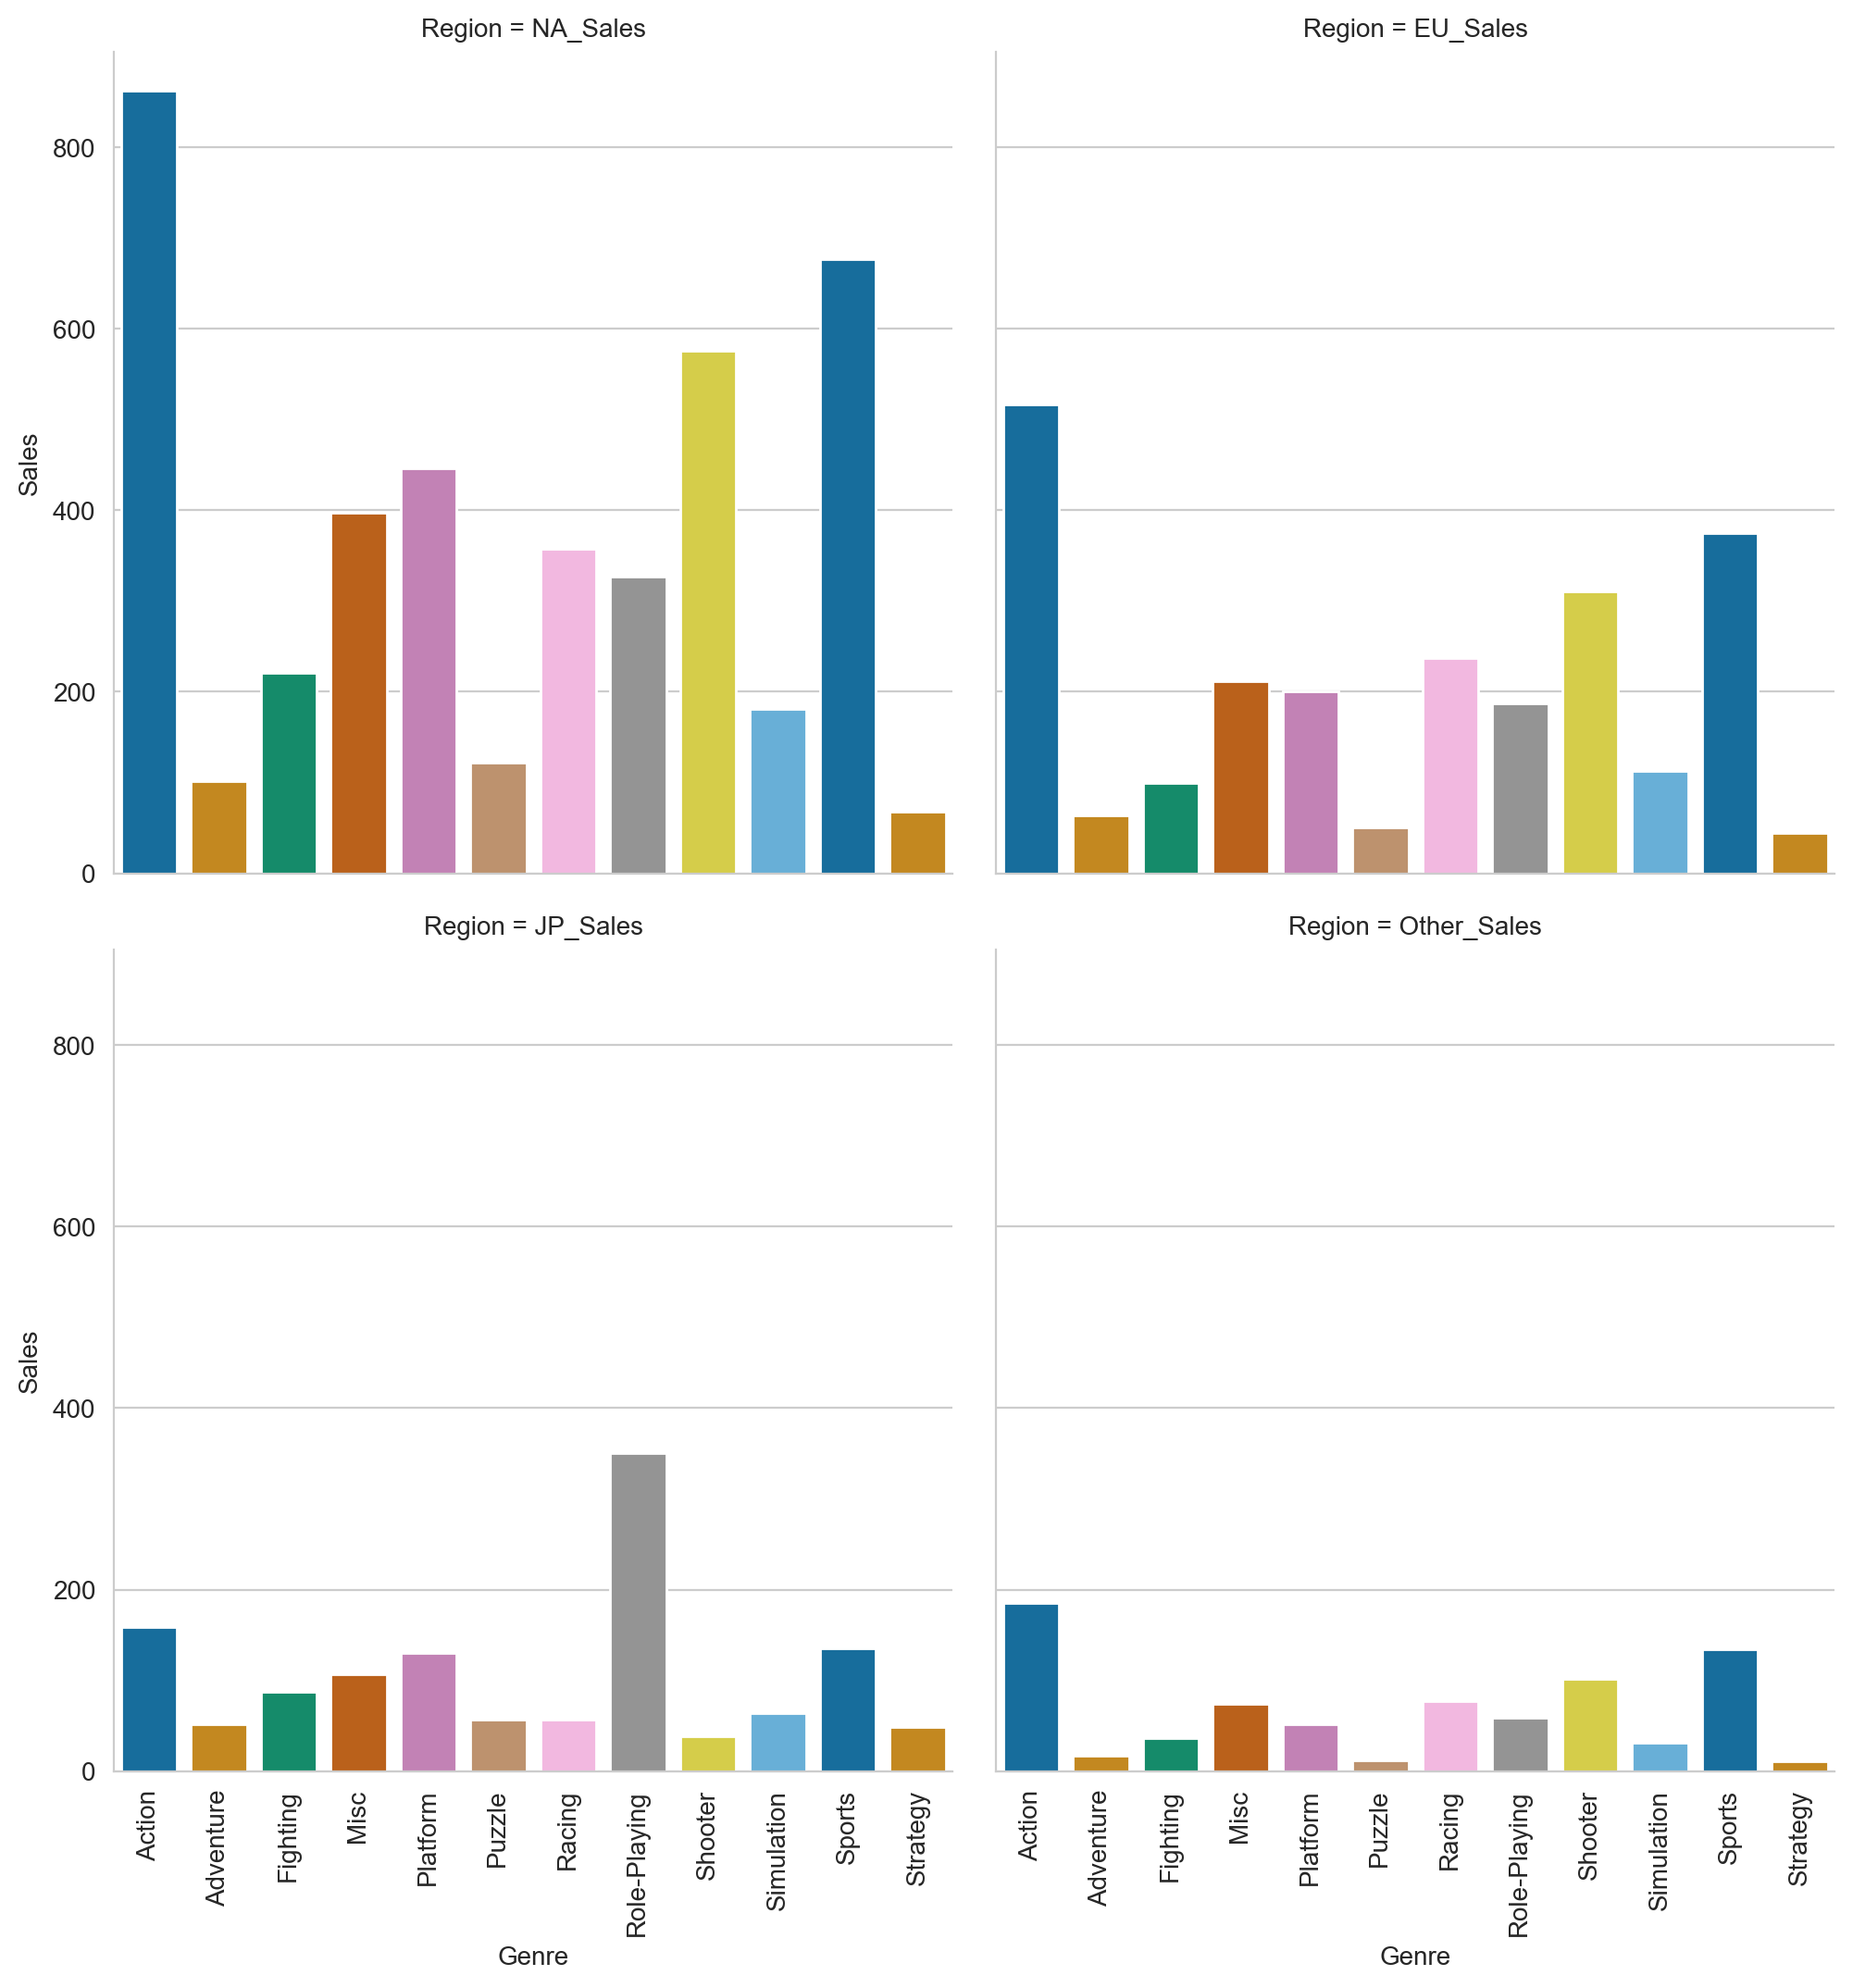

In [48]:
cat_plot(genre_melt, 'Genre', 'Sales','Region', 'bar');

- Game dengan genre Action, Sports, dan shooter merupakan tiga teratas untuk penjualan di Amerika Utara, Eropa, dan daerah lainnya. Namun untuk penjualan di Jepang ternyata Game Role-Playing menjadi game terlaris, di ikuti dengan Action dan Sports.

### Platform dengan game terlaris

In [49]:
top_platform = games.groupby('Platform', as_index = False)[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index(drop = True)
top_platform[['Platform','Global_Sales']].sort_values('Global_Sales', ascending = False)[:10]

,Platform,Global_Sales
16,PS2,1244.16
28,X360,969.67
17,PS3,949.34
26,Wii,909.81
4,DS,818.64
15,PS,727.39
6,GBA,305.62
19,PSP,292.52
18,PS4,278.07
13,PC,255.06


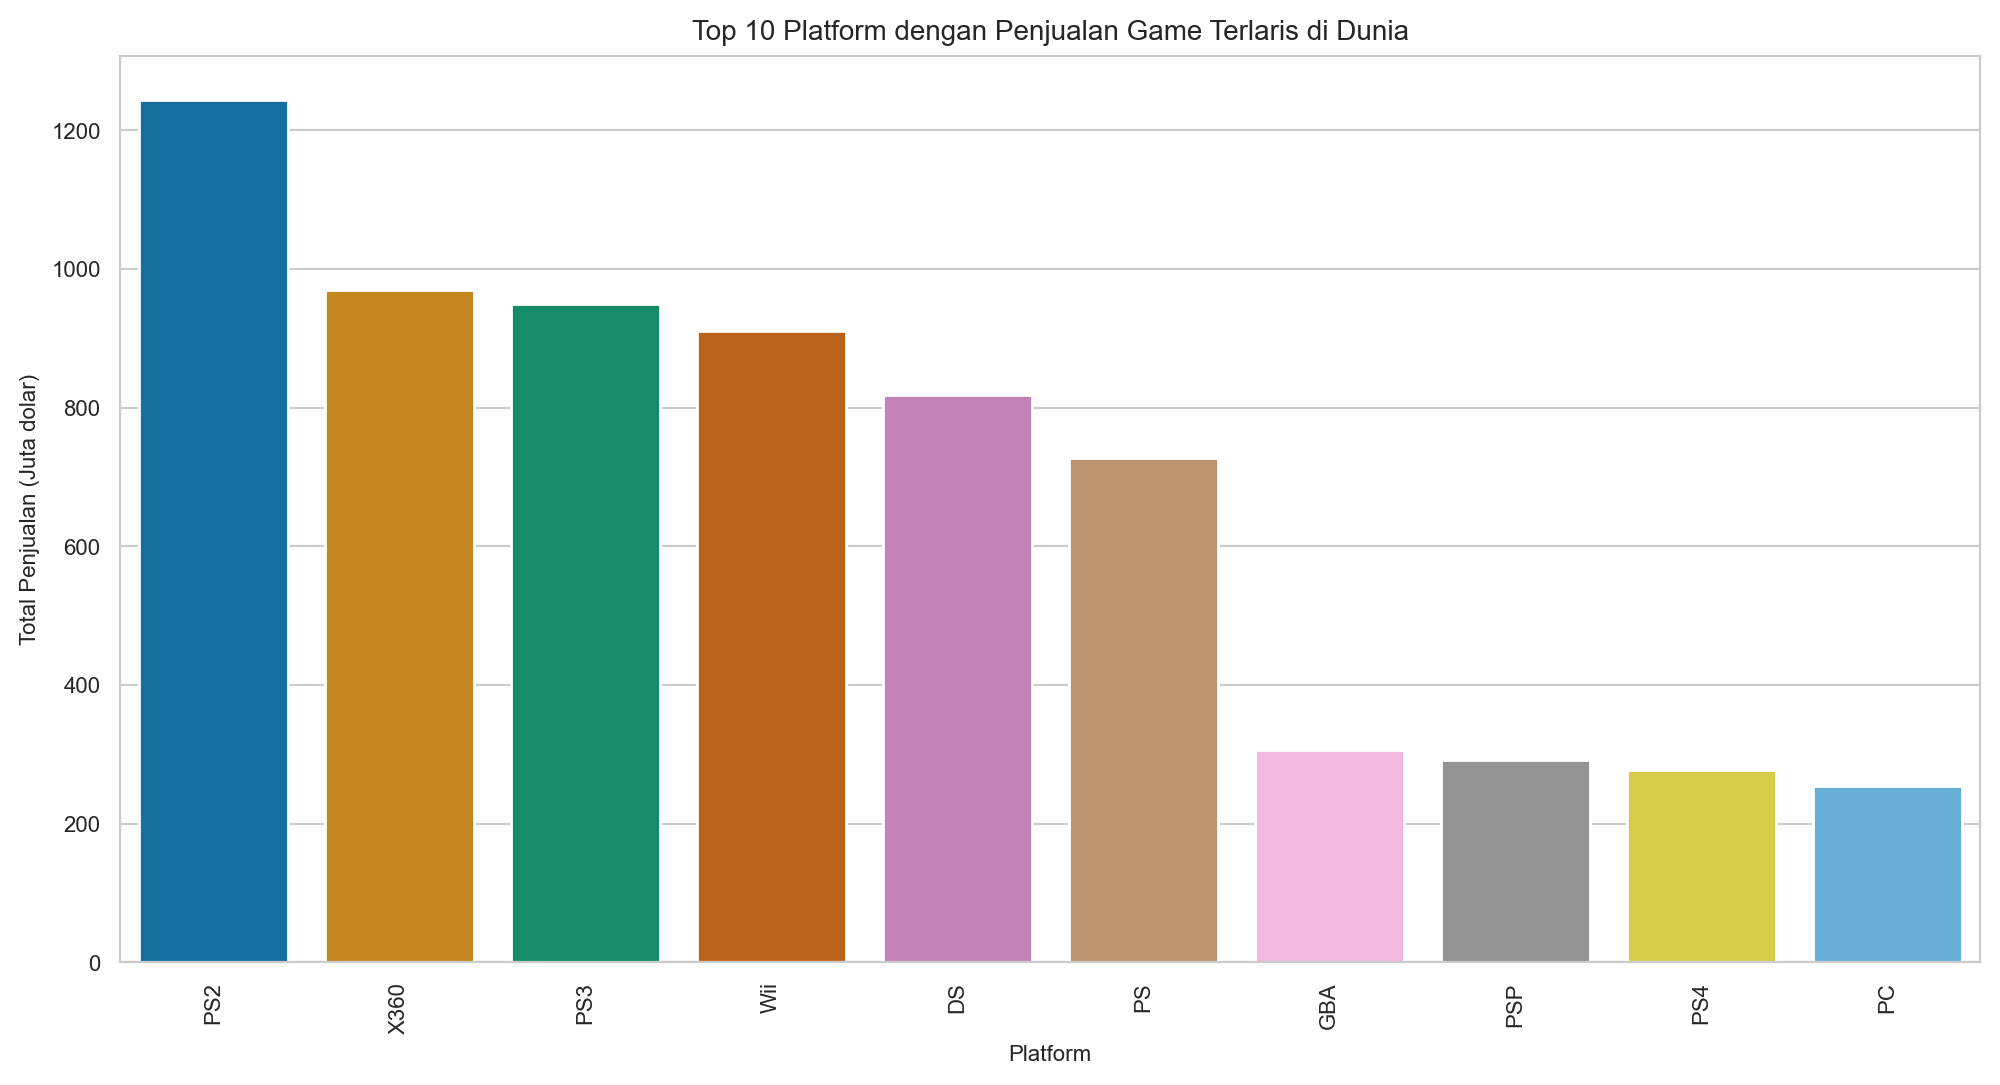

In [50]:
feature_sales(top_platform, 'Platform', 'Global_Sales', 'Top 10 Platform dengan Penjualan Game Terlaris di Dunia')

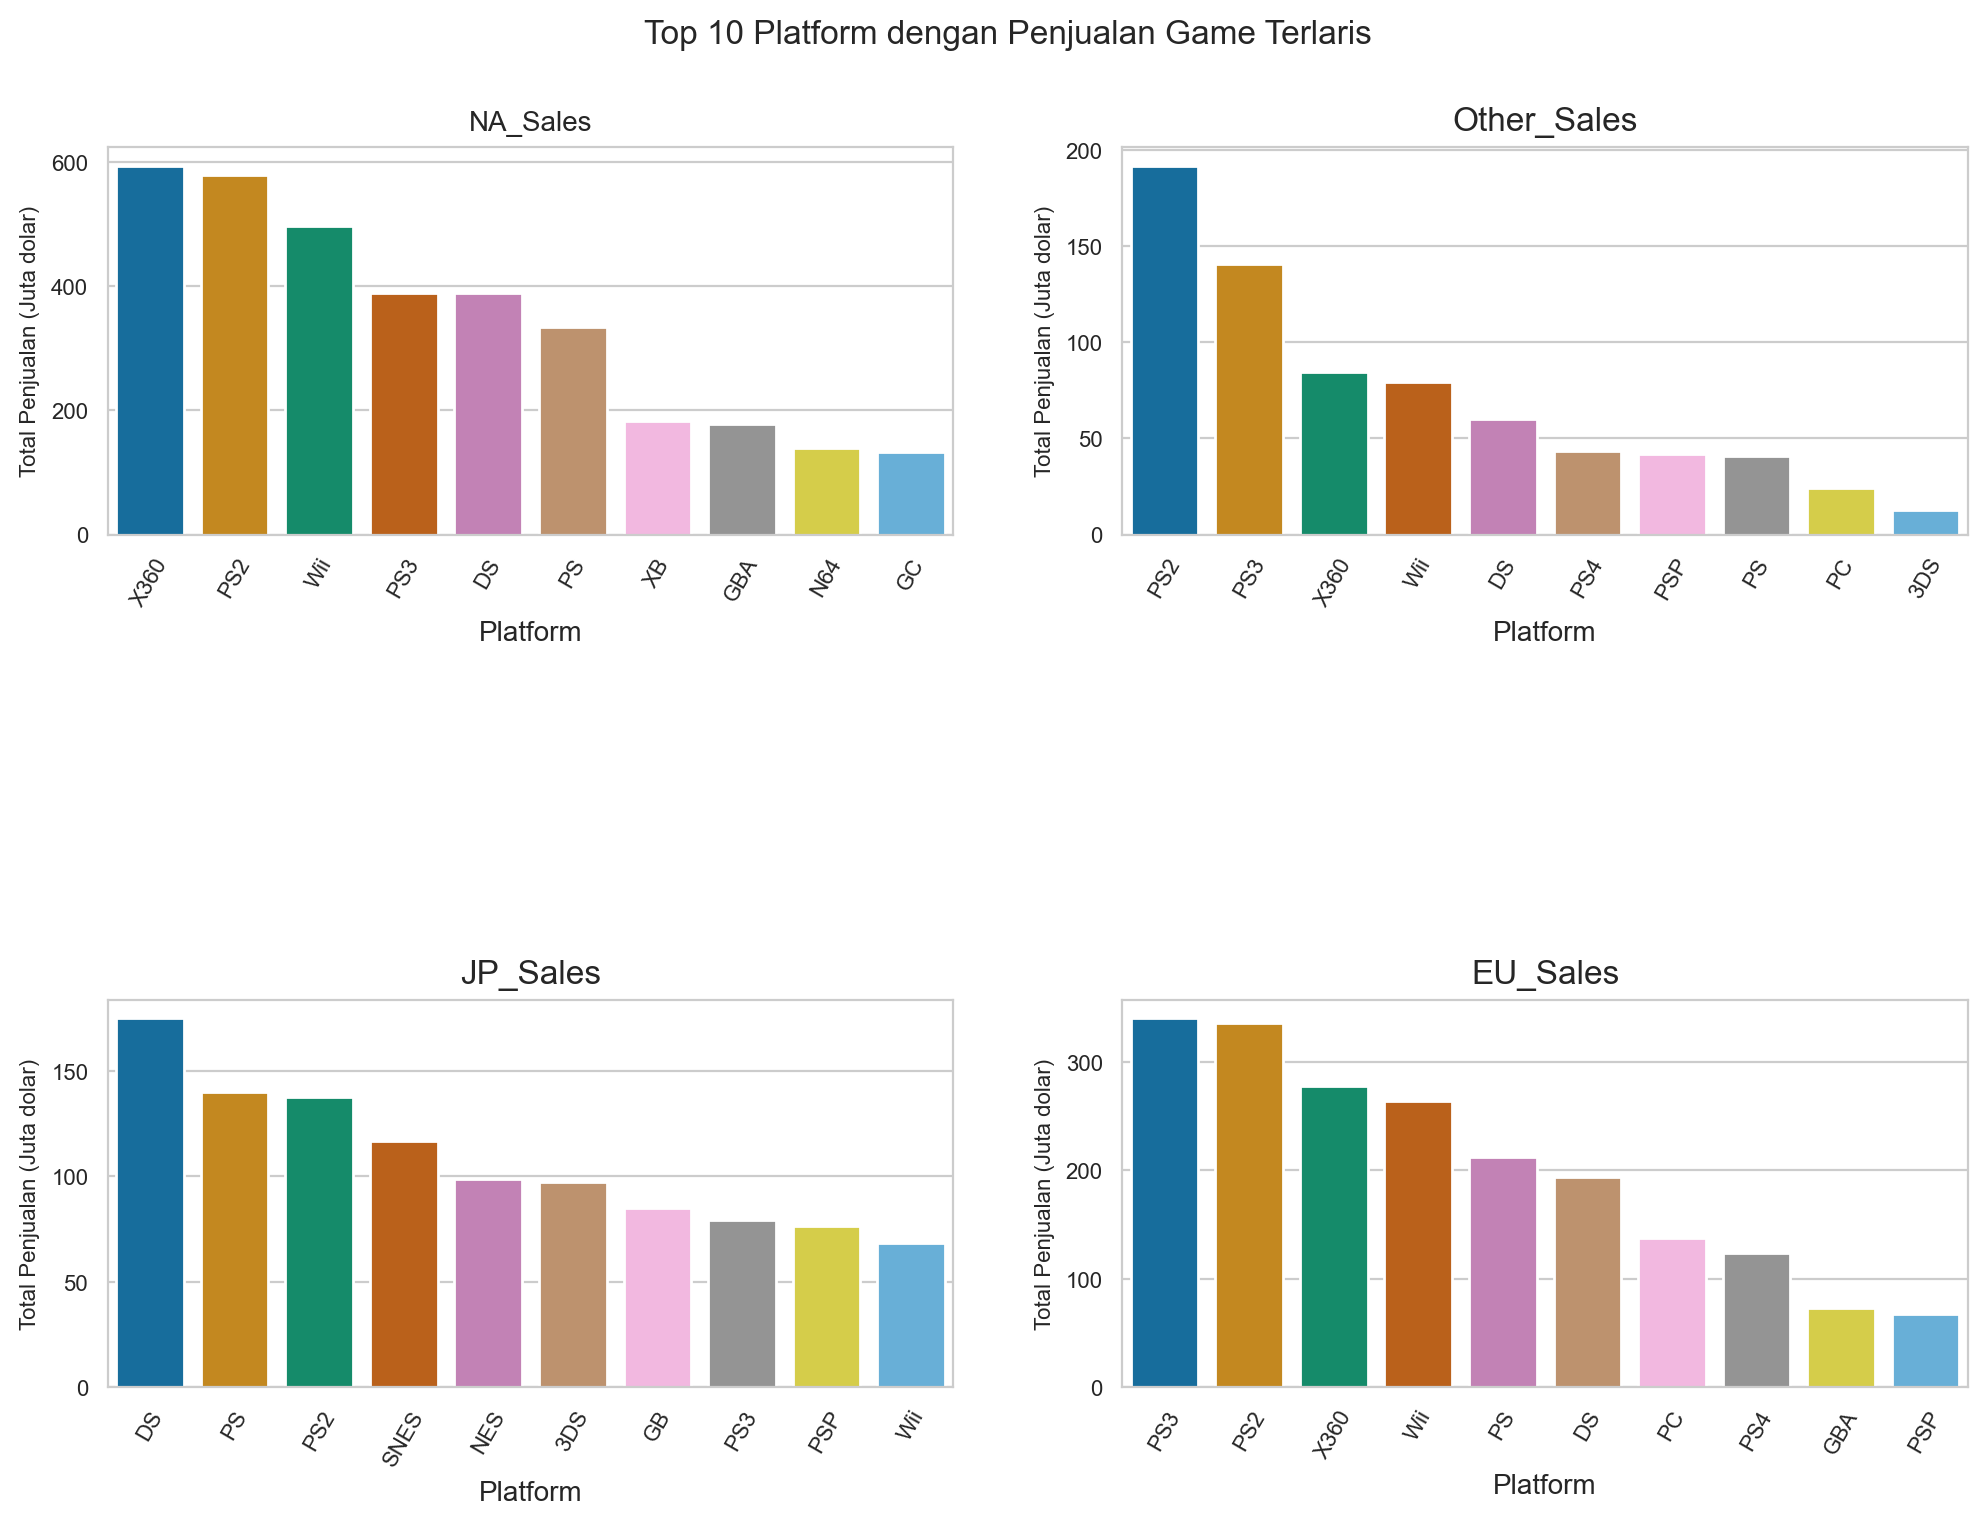

In [51]:
sales_by(top_platform, 'Platform', 'NA_Sales','EU_Sales','JP_Sales', 'Other_Sales', 'Top 10 Platform dengan Penjualan Game Terlaris')

- PS2 merupakan platform yang banyak memainkan game-game terlaris secara global, dimana game-game yang dimainkan di PS2 berhasil terjual sebesar 1.244 Milyar dolar
- Platform yang paling banyak memainkan game-game terlaris di setiap region yaitu: X360 di Amerika Utara, PS3 di Eropa, Nintendo DS di Jepang dan PS2 di negara lainnya.

###  Publisher dengan penjualan game terlaris

In [52]:
top_publisher = games.groupby('Publisher', as_index = False)[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index(drop = True)
top_publisher[['Publisher','Global_Sales']].sort_values('Global_Sales', ascending = False).head(10)

,Publisher,Global_Sales
359,Nintendo,1784.43
138,Electronic Arts,1102.76
21,Activision,721.41
455,Sony Computer Entertainment,607.28
524,Ubisoft,473.25
493,Take-Two Interactive,399.30
487,THQ,340.44
275,Konami Digital Entertainment,279.36
445,Sega,270.68
347,Namco Bandai Games,253.65


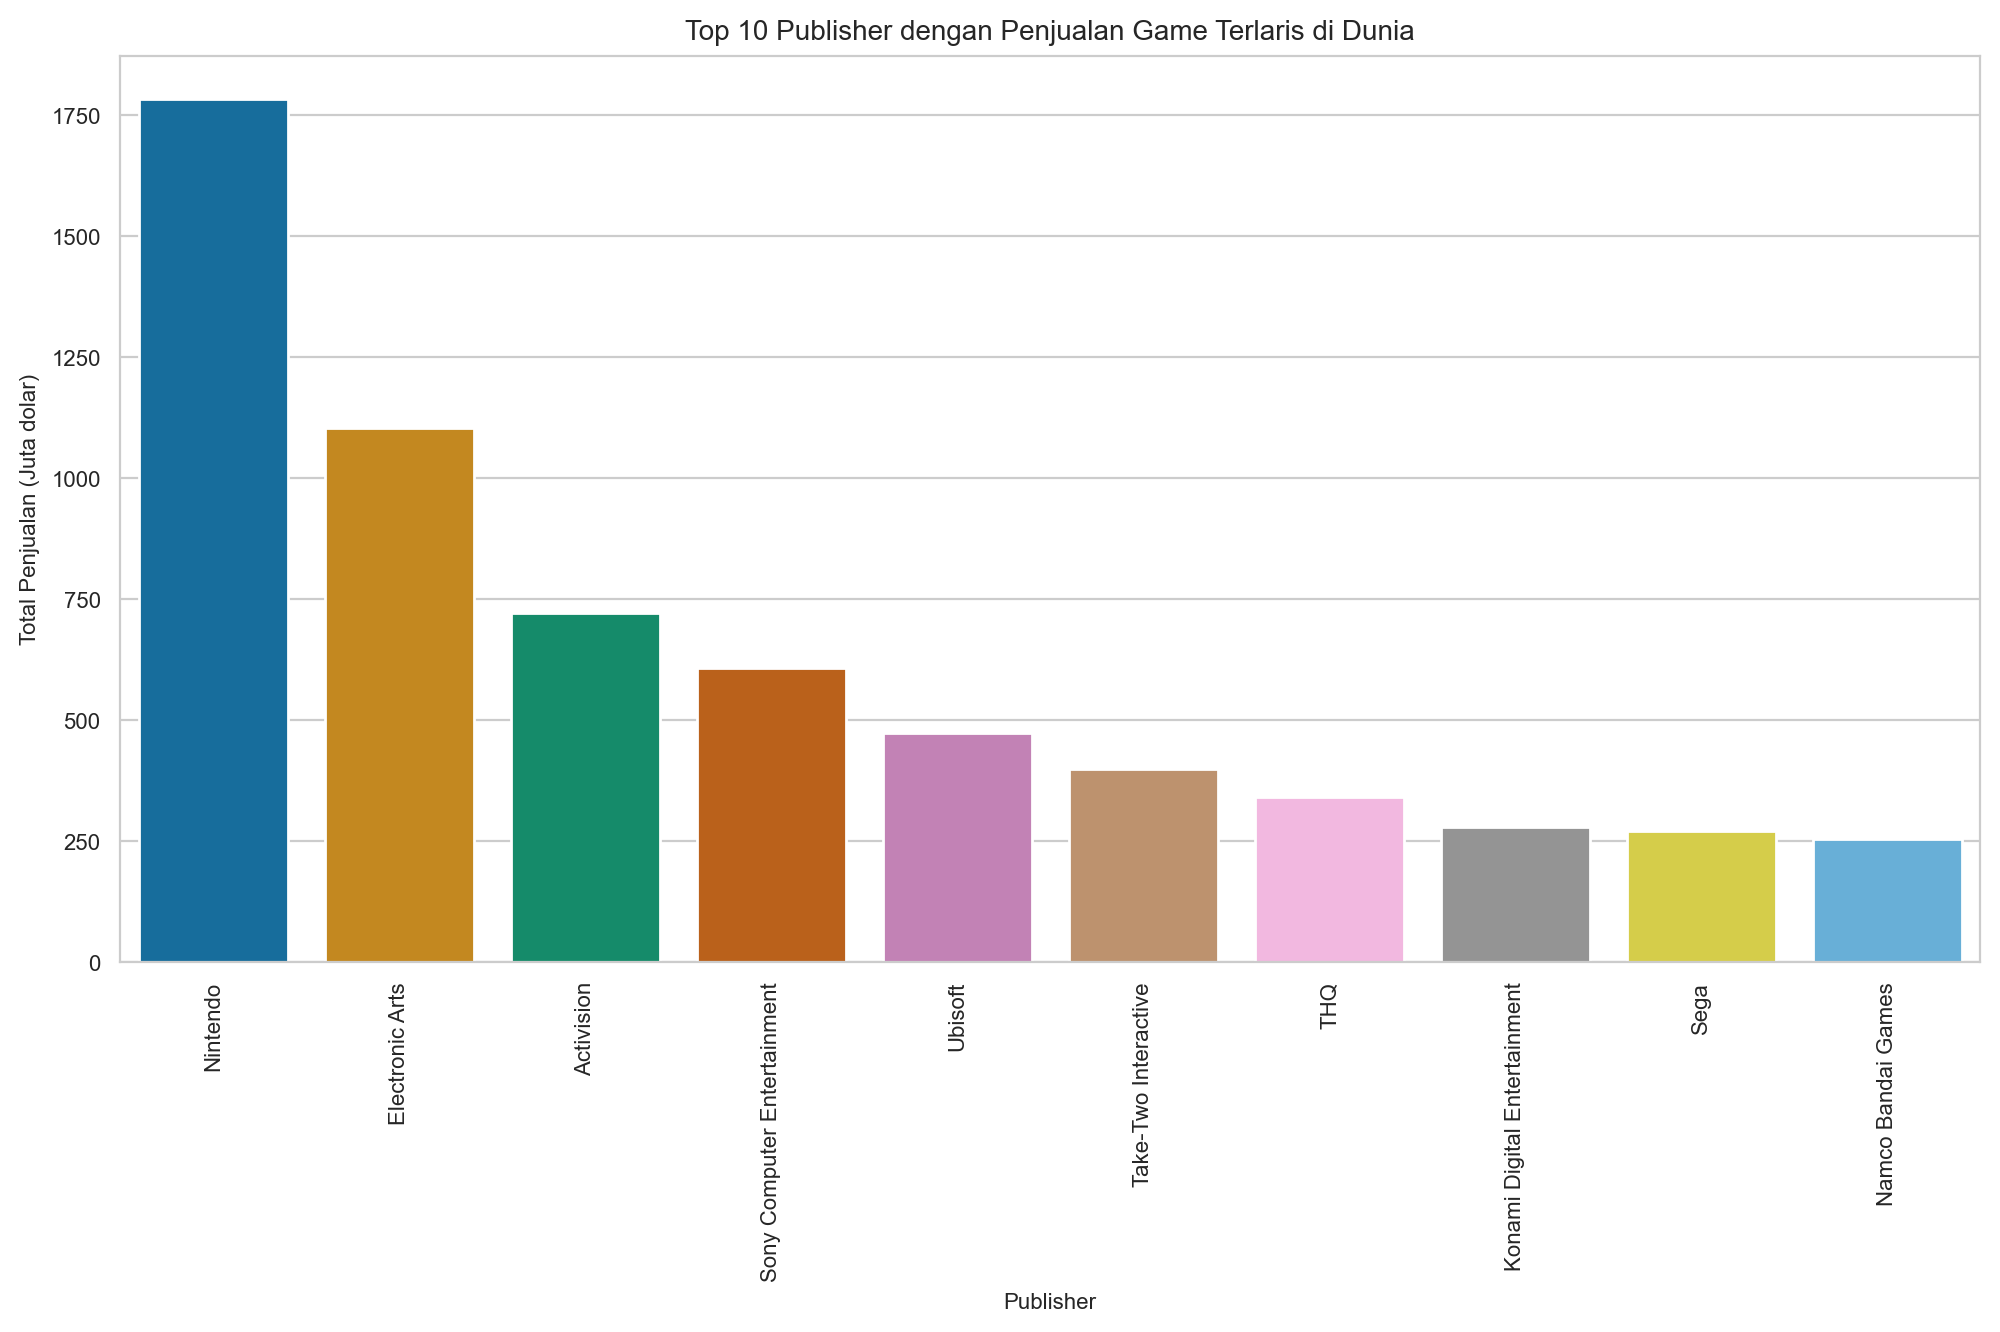

In [53]:
feature_sales(top_publisher, 'Publisher', 'Global_Sales', 'Top 10 Publisher dengan Penjualan Game Terlaris di Dunia')

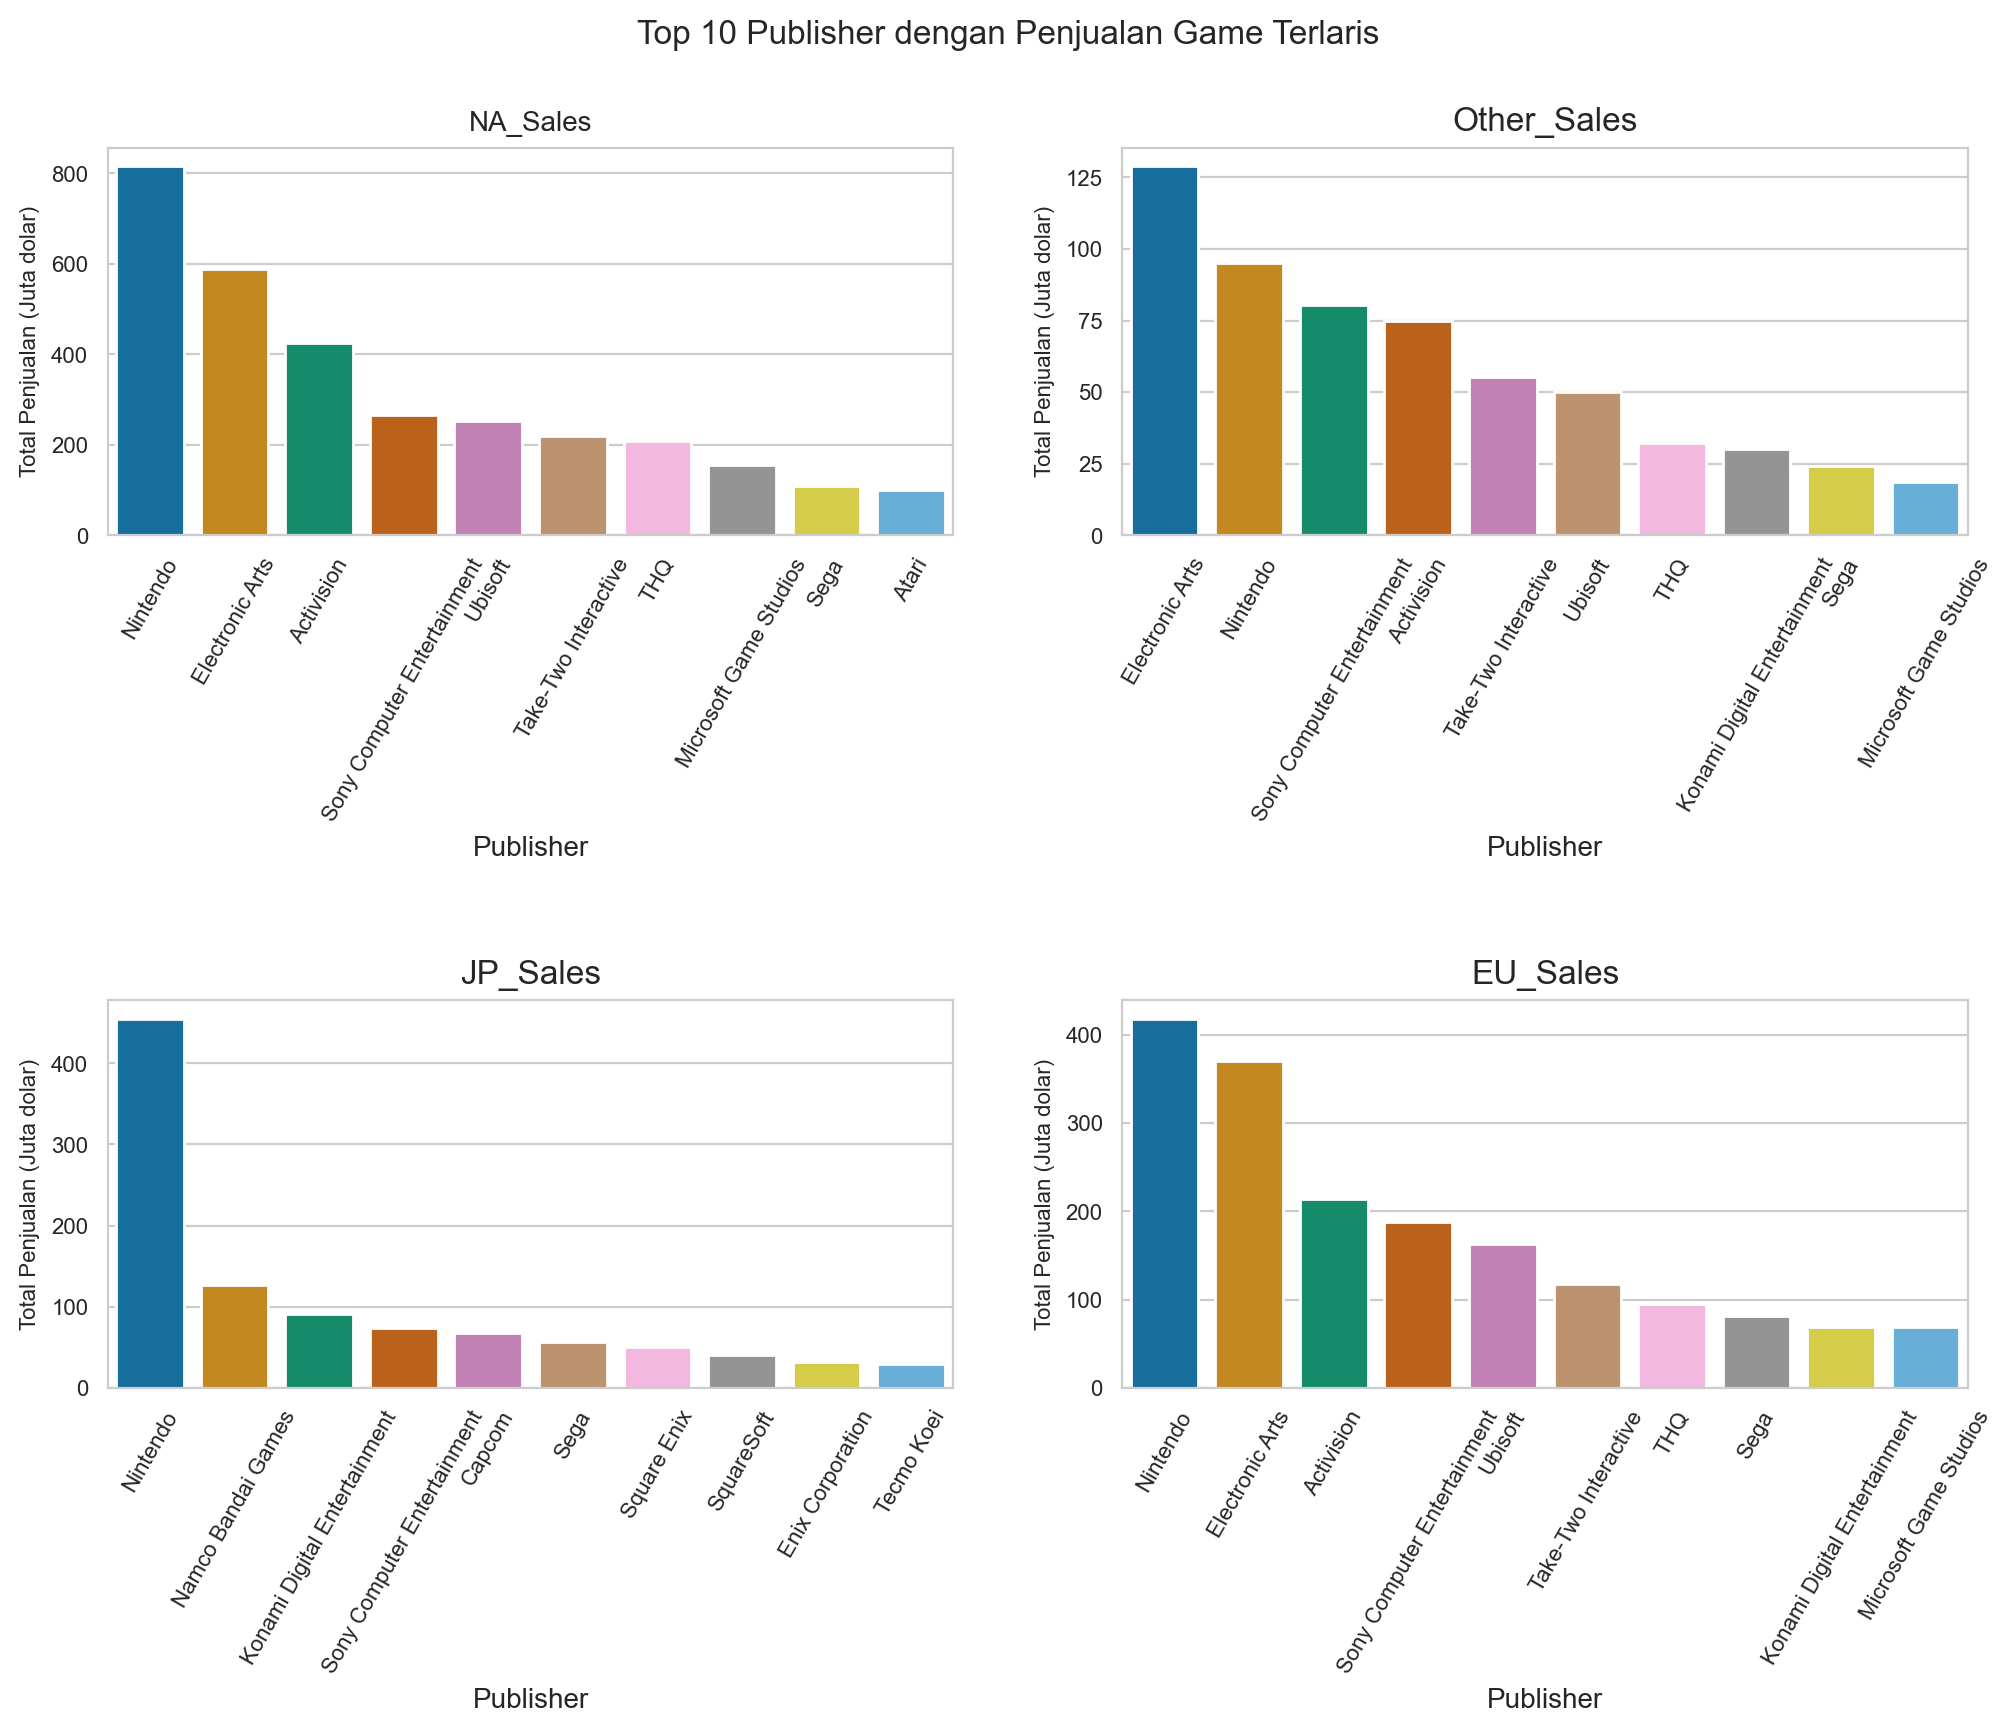

In [54]:
sales_by(top_publisher, 'Publisher', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Top 10 Publisher dengan Penjualan Game Terlaris')

- Secara global, publisher yang paling banyak menjual video game nya adalah Nintendo dengan 1.78 Milyar dolar, diikuti oleh EA 1.1 Milyar dolar dan Activision 721 juta dolar

- Wilayah Amerika Utara dan Eropa memiliki Top 3 publisher video game yang sama dengan top 3 global yaitu: Nintendo, EA, dan Activision

- Publisher dengan penjualan game terlaris cukup unik di Jepang, dimana penjualan game nya di dominasi oleh publisher dalam negeri. Bahkan EA yang peringkat top 2 di Amerika Utara Eropa dan Negara lainnya tidak masuk top 10 di Jepang.

- Untuk Negara lainnya ternyata penjualan game oleh publisher EA mengungguli penjualan game Nintendo.